<a href="https://colab.research.google.com/github/wahyunh10/Car-Auction-Prices-Project/blob/main/Car_Auction_Prices_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Auction Prices Project**

1. Role: Sebagai tim data scientist dalam suatu perusahaan bernama PT.Dats Your Future yang berperan sebagai dealer jual beli mobil bekas yang bertanggung jawab untuk memberikan rekomendasi harga mobil bekas berdasarkan data histori pembelian 2 tahun sebelumnya yang ada di Amerika yang diasumsikan ideal karena mobil berhasil dibeli dan dijual kembali ke konsumen dengan harga ideal.
2. Masalah:
  * Perusahaan menentukan harga beli mobil bekas tidak terstandar (tidak sesuai kondisi mobil sebenarnya) sehingga mendapat harga mobil bekas yang berbeda dari perspektif yang bias oleh setiap staff.
   * Proses screening dan negosiasi yang cukup lama akhirnya customer menjadi ragu dan cenderung tidak menjual mobil nya ke perusahaan kita.
3. Goal: Bisa membantu perusahaan menentukan harga beli mobil bekas yang dapat terstandarkan berdasarkan model machine learning.
4. Objective: Membuat tools / model machine learning untuk membantu memprediksi harga mobil berdasarkan kondisi sebenarnya.
5. usiness Metrics: Sales Pembelian dan Efisiensi Waktu

# **Final Project - Stage 1 EDA, Insight, Visualization**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Mengubah parameter default matplotlib**
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# **Load dataset**
Kita akan melihat dataset prediksi harga mobil

The dataset contains historical car auction sales prices, scraped from the outside internet sources collected in 2015. This dataset taken from kaggle (https://www.kaggle.com/tunguz/used-car-auction-prices).

This dataset contains 491641 rows and 15 columns:

* year : information of year production of the car
* make : brand of the car
* model : model of the brand car
* trim : spesific model of the car
* body : body type of the car
* transmission : transmission type of the car
* vin : unique id of the car
* state : code state where the transaction happened
* condition : rating condition of the car
* odometer : total distance of the car
* color : body color of the car
* interior : interior color of the car
* seller : place that sold the car
* mmr : market price of the car
* sellingprice : price of the car
* saledate : date when the car sold

In [3]:
df = pd.read_csv("car_prices.csv")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8,13,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Unnamed: 16
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),NaN
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),NaN
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),NaN


# **Descriptive Statistics**

Hal pertama yang biasanya dilakukan dalam EDA adalah mengecek tipe data setiap kolom dan jumlah nilai yang hilang. Hal ini bisa kita lakukan dengan menggunakan df.info().

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
 16  Unnamed: 16   25 non-null      object 
dtypes: float64(1), int64(2), object(14)
memory usage

Kita dapat melihat bahwa:

1. Dataframe memiliki total 558811 baris dan 16 kolom
2. Target output sepertinya adalah kolom `sellingprice` dengan tipe data `int64`
3. Berarti sisanya adalah feature
Dari informasi di atas, kita bisa pisahkan kolom kategorical dan numerical sebagai berikut:

Dari informasi di atas, kita bisa pisahkan kolom kategorical dan numerical sebagai berikut:

In [5]:
cats = ['make', 'model', 'trim', 'body', 'transmission','vin','state','color','interior','seller','saledate']
nums = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

# **Sampling untuk memahami data**

Setelah mengetahui kolom apa saja yang ada di dalam dataset, kita lakukan sampling untuk memastikan apakah isi kolomnya sesuai ekspektasi. Biasakan lakukan ini beberapa kali karena seringkali apabila ada keanehan tidak akan keluar pada sampling pertama.

Sampling dapat dilakukan dengan menggunakan `df.sample()`

In [6]:
df.sample(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Unnamed: 16
383794,2009,Ford,Taurus,SE,Sedan,automatic,1fahp23w79g120429,oh,2.9,135516.0,silver,gray,dt credit corporation,4075,4400,Thu Mar 05 2015 01:00:00 GMT-0800 (PST),NaN
210768,2011,Chevrolet,Silverado 1500,LT,Crew Cab,automatic,3gcpkse35bg409066,oh,4.9,34021.0,black,black,chevrolet of dublin,26100,24900,Tue Jan 27 2015 01:30:00 GMT-0800 (PST),NaN
156697,2014,Jeep,Grand Cherokee,Laredo,SUV,automatic,1c4rjfag1ec469154,pa,3.0,12639.0,white,black,hertz corporation/gdp,27100,27100,Thu Jan 22 2015 01:30:00 GMT-0800 (PST),NaN
58292,2006,Chevrolet,Tahoe,LS,SUV,automatic,1gnec13vx6r143480,fl,2.9,125334.0,red,beige,wells fargo dealer services,5775,5400,Tue Dec 30 2014 09:30:00 GMT-0800 (PST),NaN
27136,2002,Ford,Taurus,SES,Sedan,automatic,1fafp55u62g166456,oh,1.9,149801.0,gray,gray,wells fargo financial acceptance,1025,950,Tue Dec 23 2014 12:00:00 GMT-0800 (PST),NaN
445074,2003,Nissan,Murano,SL,SUV,automatic,jn8az08t73w110171,nc,2.5,151311.0,blue,tan,united consumer finance,3225,1600,Mon May 25 2015 02:30:00 GMT-0700 (PDT),NaN
127957,2008,Saturn,Outlook,XR,SUV,automatic,5gzer23738j204747,tx,2.2,118034.0,white,black,supreme fcu,7775,8100,Wed Jan 14 2015 02:30:00 GMT-0800 (PST),NaN
362621,2012,Ford,F-150,Lariat,SuperCrew,automatic,1ftfw1ct8cfa36119,fl,4.6,53811.0,white,tan,ford-lincoln dealer program,26100,28900,Fri Feb 27 2015 01:00:00 GMT-0800 (PST),NaN
90225,2010,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1cv3ake63326,tx,4.4,67126.0,red,black,california republic bank,18950,19900,Thu Jan 08 2015 11:00:00 GMT-0800 (PST),NaN
357113,2008,Ford,F-150,STX,SuperCab,automatic,1ftrx12w78fc15376,pa,2.9,65499.0,black,gray,autolenders liquidation center,10400,10900,Fri Feb 27 2015 01:00:00 GMT-0800 (PST),NaN


Beberapa pengamatan:

* Target kita, `sellingprice` benar bertipe int64

# **Statistical summary**

Selanjutnya kita munculkan ringkasan statistik dataframe, baik untuk numerical dan categorical. Hal ini dilakukan untuk mengecek secara singkat akan keberadaan outlier dan karakteristik distribusi untuk feature numeric.

In [7]:
df[nums].describe()

,year,odometer,sellingprice
count,558837.000000,558743.000000,558837.000000
mean,2010.038927,68320.025256,13611.270884
std,3.966864,53398.533625,9749.431107
min,1982.000000,1.000000,1.000000
25%,2007.000000,28371.000000,6900.000000
50%,2012.000000,52254.000000,12100.000000
75%,2013.000000,99109.000000,18200.000000
max,2015.000000,999999.000000,230000.000000


In [8]:
df[cats].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548536,548438,548186,545642,493484,558833,558837,558088,558088,558837,558837
unique,96,973,1973,87,4,550298,63,45,17,14266,3765
top,Ford,Altima,Base,Sedan,automatic,automatic,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199438,475915,21,82945,110970,244329,19693,5334


Beberapa pengamatan dari *statistical summary* kolom kategorikal di atas:

* Kolom `trim`,`vin`,`seller` memiliki jumlah nilai unik yang banyak, ada kemungkinan tidak terlalu berguna untuk modeling
* Mayoritas dari data set ini yaitu menjual Mobil dari pabrikan (`make`) Ford, dengan model (`body`) sedan.

# **Value Counting**

Kita dapat memastikan pengamatan mengenai kolom-kolom `categorical` di atas dengan value counting

In [9]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom make:
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: make, Length: 96, dtype: int64

Value count kolom model:
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: model, Length: 973, dtype: int64

Value count kolom trim:
Base                   55817
SE                     43648
LX                     20757
Limited                18356
LT                     16915
                       ...  
cargo 4x2 yf7 upfit        1
sub 4x4 v8 lt              1
srw 4x4 ex xl              1
sport fwd                  1
Power Wagon                1
Name: trim, Length: 1973, dtype: int64

Value count kolom body:
Sedan          199438
SUV 

**Duplicates and Unique**

In [10]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 17)


In [11]:
df.make.unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

In [12]:
len(df.make.unique())

97

In [13]:
# lowercase data make 
df.make = df.make.str.lower()
len(df.make.unique())

67

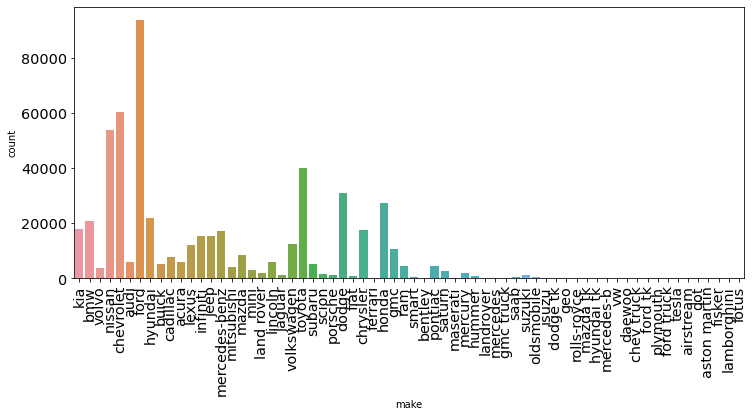

In [14]:
plt.figure(figsize=(12,5))
chart = sns.countplot(x=df.make)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

> Berdasarkan data diatas ditemukan insight, bahwasanya mobil dengan merek Ford menjadi mobil yang paling sering dijual



In [15]:
len(df.model.unique())

974

In [16]:
# lowercase data make 
df.model = df.model.str.lower()
len(df.model.unique())

852

In [17]:
df.model.value_counts()

altima        19349
f-150         14479
fusion        12946
camry         12549
escape        11893
              ...  
mountnr           1
uplandr           1
ram van           1
400-class         1
458 italia        1
Name: model, Length: 851, dtype: int64

In [18]:
len(df.body.unique())

88

In [19]:
df.body.unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', ' Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'exte

In [20]:
# lowercase data body 
df.body = df.body.str.lower()
len(df.body.unique())

47

In [21]:
df.body.value_counts().head(10)

sedan          241344
suv            143844
hatchback       26237
minivan         25529
coupe           17752
crew cab        16394
wagon           16129
convertible     10476
supercrew        9033
g sedan          7417
Name: body, dtype: int64

Beberapa pengamatan pada proses diatas:

* Tidak ada data yang bersifat duplikat
* Beberapa data pada kolom `make` diubah menjadi lowercase sehingga jumlah data unique dari 97 berubah menajadi 67
* Beberapa data pada kolom `model` diubah menjadi lowercase sehingga jumlah data unique dari 974 berubah menajadi 852
* Beberapa data pada kolom `make` diubah menjadi lowercase sehingga jumlah data unique dari 87 berubah menjadi 46

# **Univariate Analysis**

Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

# **Box plots**

TypeError: ignored

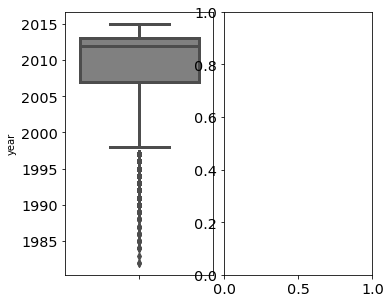

In [67]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(data=df[nums], y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.

* Outlier terlihat hampir di setiap kolom kecuali condition
* Dari boxplotnya terlihat mana distribusi yang terlihat skewed: year, odometer, mmr,sellingprice

Kesimpulan:

* Mobil keluaran tahun 1997 ke bawah dianggap data outlier.
* Berdasarkan kondisi mobil, tidak ada yg termasuk data outlier
* Mobil dgn total perjalanan lebih dari 2000 km termasuk data outlier.
* Mobil dgn mmr lebih dari 35000 termasuk data outlier.
* Mobil dgn harga jual lebih dari 35000 termasuk data outlier.

# **Dist plots**

In [57]:
df.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: ignored

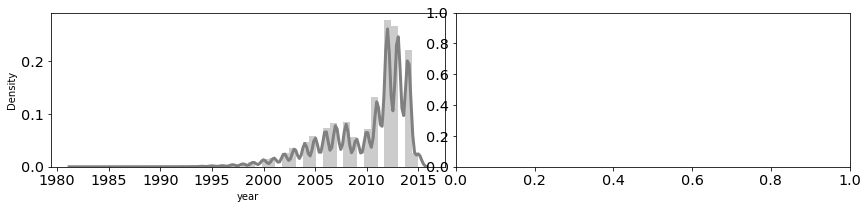

In [62]:
plt.figure(figsize=(12, 8))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:

* Seperti dugaan kita ketika melihat boxplot di atas, kolom `year`, `odometer`, `mmr`, `sellingpric`e *skewed*

Kesimpulan:

* Berarti ada kemungkinan kita perlu melakukan sesuatu pada kolom2 tersebut nantinya
* Selain kolom2 itu distribusinya terlihat normal-normal saja
* Mayoritas tahun pembuatan mobil ada pada rentang 2007-2013. Mobil tertua yg dijual keluaran tahun 1982.
* Mayoritas kondisi mobil yg dijual berada di kelas 3-4.
* Mayoritas jarak tempuh mobil yg dijual adalah sebesar 100-1000 km. Mobil yg dijual dgn jarak tempuh terjauh adalah 10000 km.
* Mayoritas harga jual mobil berada pada rentang 5000-15000. Harga tertinggi mobil adalah 235000.

# **Violin plots**

TypeError: ignored

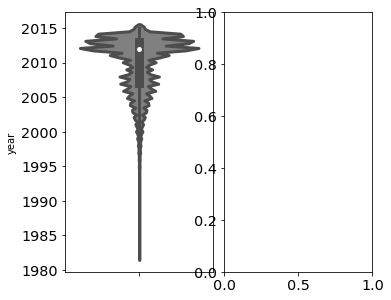

In [59]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

Alternatif dari kedua plot di atas adalah violin plot. Dengan melihat violin plot di atas, *insight* yang kita temukan ketika melihat box plot dan distribution plot juga dapat diamati.

# **Count plot (categorical)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


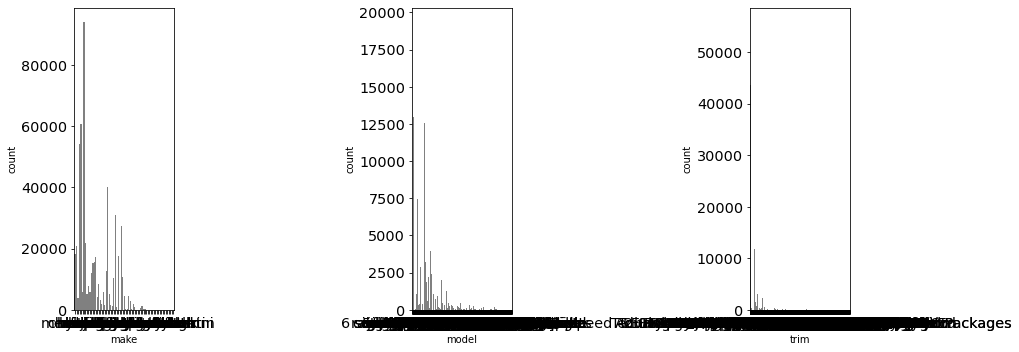

In [63]:
plt.figure(figsize=(14, 5))
plt.subplot(1,3,1)
sns.countplot(df['make'], color='gray', orient='v')
plt.subplot(1,3,2)
sns.countplot(df['model'], color='gray', orient='v')
plt.subplot(1,3,3)
sns.countplot(df['trim'], color='gray', orient='v')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


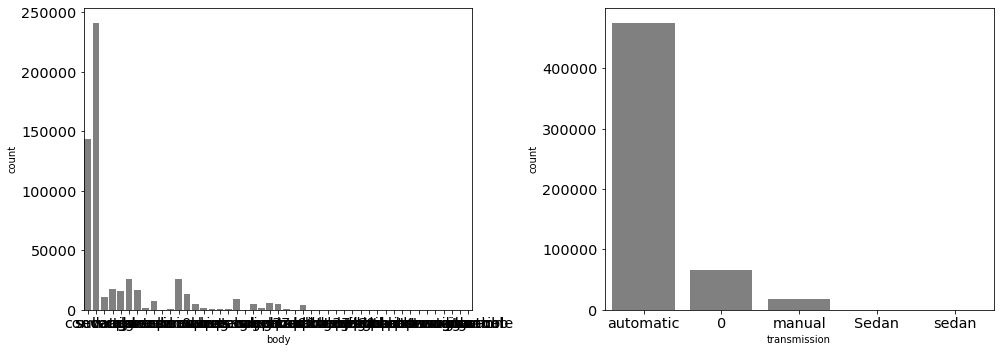

In [64]:
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
sns.countplot(df['body'], color='gray', orient='v')
plt.subplot(1,2,2)
sns.countplot(df['transmission'], color='gray', orient='v')
plt.tight_layout()

Berdasarkan count plot diatas,

* untuk kategori transmisi, ditemukan bahwa, mobil dengan transmisi automatic menjadi mobil bekas yang paling dijual

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


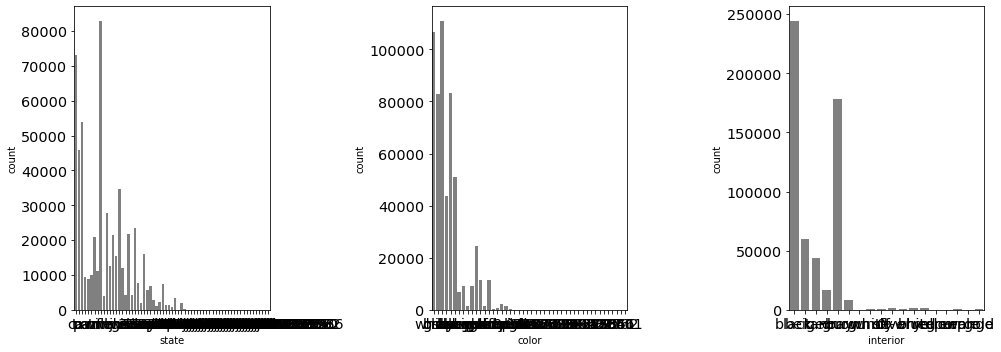

In [65]:
plt.figure(figsize=(14, 5))
plt.subplot(1,3,1)
sns.countplot(df['state'], color='gray', orient='v')
plt.subplot(1,3,2)
sns.countplot(df['color'], color='gray', orient='v')
plt.subplot(1,3,3)
sns.countplot(df['interior'], color='gray', orient='v')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


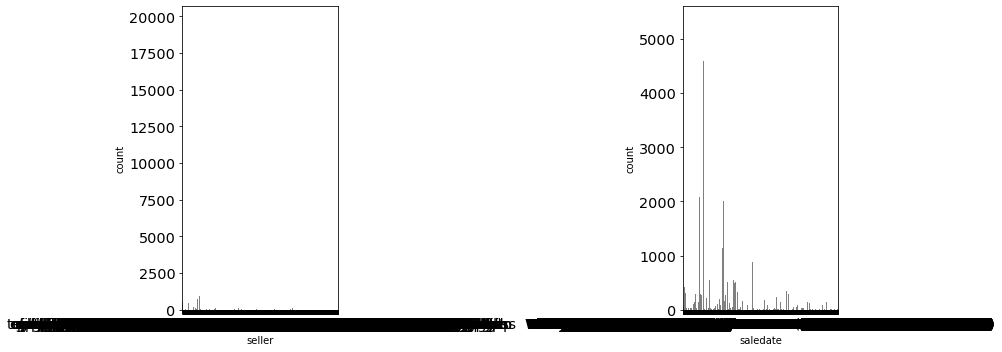

In [66]:
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
sns.countplot(df['seller'], color='gray', orient='v')
plt.subplot(1,2,2)
sns.countplot(df['saledate'], color='gray', orient='v')
plt.tight_layout()

# **Bivariate Analysis**

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan feature yang redundan.

# **Correlation heatmap**

In [68]:
df.corr()

,year,odometer,sellingprice
year,1.000000,-0.772052,0.586468
odometer,-0.772052,1.000000,-0.582026
sellingprice,0.586468,-0.582026,1.000000


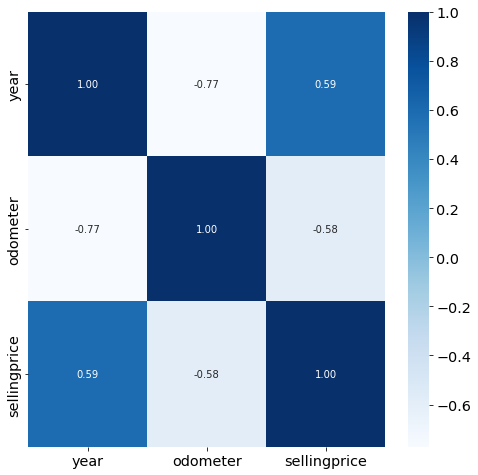

In [69]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari correlation heatmap di atas dapat dilihat bahwa:

* Target kita sellingprice memiliki korelasi positif kuat dengan tahun
* Memiliki korelasi positif sangat kuat dengan mmr, namun untuk kolom ini tidak akan digunakan maka di stage selanjutnya kolom mmr dapat didrop
* `Condition` memberikan korelasi positif kuat dengan selling price dan mmr.
* `Odometer` memiliki korelasi negatif kuat ke empat fitur lainnya

# **Pair plot**

<Figure size 1080x1080 with 0 Axes>

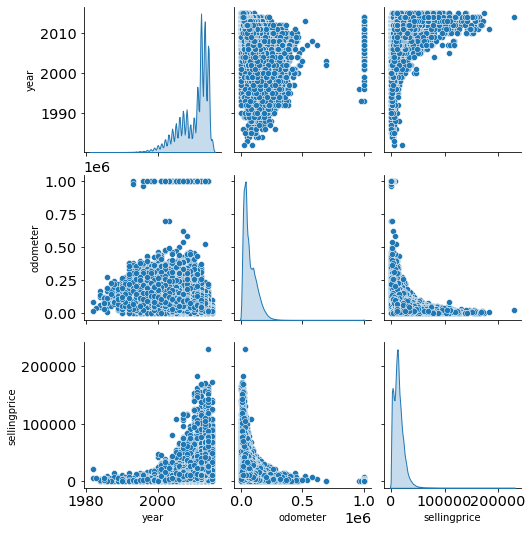

In [70]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

In [71]:
df.sort_values(['odometer'], ascending=False)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Unnamed: 16
57588,2008,nissan,rogue,S,suv,0,jn8as58t48w002423,md,1.0,999999.0,0,0,wells fargo dealer services,3650,275,Tue Dec 30 2014 13:00:00 GMT-0800 (PST),0
194973,2009,saturn,vue,XE,suv,automatic,3gscl33p89s590909,ny,2.0,999999.0,blue,gray,santander consumer,4425,2900,Wed Jan 28 2015 01:50:00 GMT-0800 (PST),0
452262,1999,mitsubishi,eclipse spyder,GS,convertible,automatic,4a3ax35g5xe138358,fl,2,999999.0,silver,gray,coggin honda of st. augustine,750,650,Thu May 21 2015 06:00:00 GMT-0700 (PDT),0
13317,2009,chevrolet,cobalt,LT,coupe,automatic,1g1at18h797165360,tx,0,999999.0,white,gray,mei finance,3375,400,Thu Dec 18 2014 14:00:00 GMT-0800 (PST),0
462300,2006,chevrolet,silverado 1500,LS,extended cab,automatic,2gcec19v261319172,ca,2,999999.0,red,gray,800 loan mart,2075,4200,Thu May 28 2015 05:00:00 GMT-0700 (PDT),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29498,1998,chevrolet,blazer,LS,suv,automatic,1gncs13wxw2254123,fl,0,0.0,silver,gray,coggin chevrolet at the avenues,650,350,Thu Dec 18 2014 13:00:00 GMT-0800 (PST),0
26181,2003,kia,sedona,LX,minivan,0,kndup131636491179,wa,0,0.0,silver,—,sound ford inc,1100,350,Wed Dec 17 2014 12:30:00 GMT-0800 (PST),0
26102,2003,land rover,range,rover hse,0,automatic,salme11413a117961,az,0,0.0,gold,beige,trans pacific leasing llc,5425,4500,Thu Dec 18 2014 11:00:00 GMT-0800 (PST),0
27335,2002,jeep,liberty,Limited,suv,0,1j4gl58k52w245833,ny,0,0.0,blue,—,fuccillo kia,2800,500,Thu Dec 18 2014 12:45:00 GMT-0800 (PST),0


KeyboardInterrupt: ignored

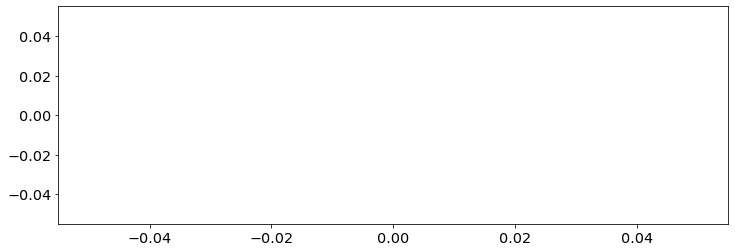

In [73]:
sns.lineplot(x=df['odometer'],y=df['sellingprice'])

Jika pada plot odometer nilai maks 1 = 382k, maka dari plot tersebut sellingprice akan mulai menunjukan penurunan yang cukup signifikan di odometer dengan nilai 3820

# **Category plots**
Terakhir kita tampilkan *category plot* untuk setiap pasangan kategori *numeric* dan *categorical* seperti di bawah ini

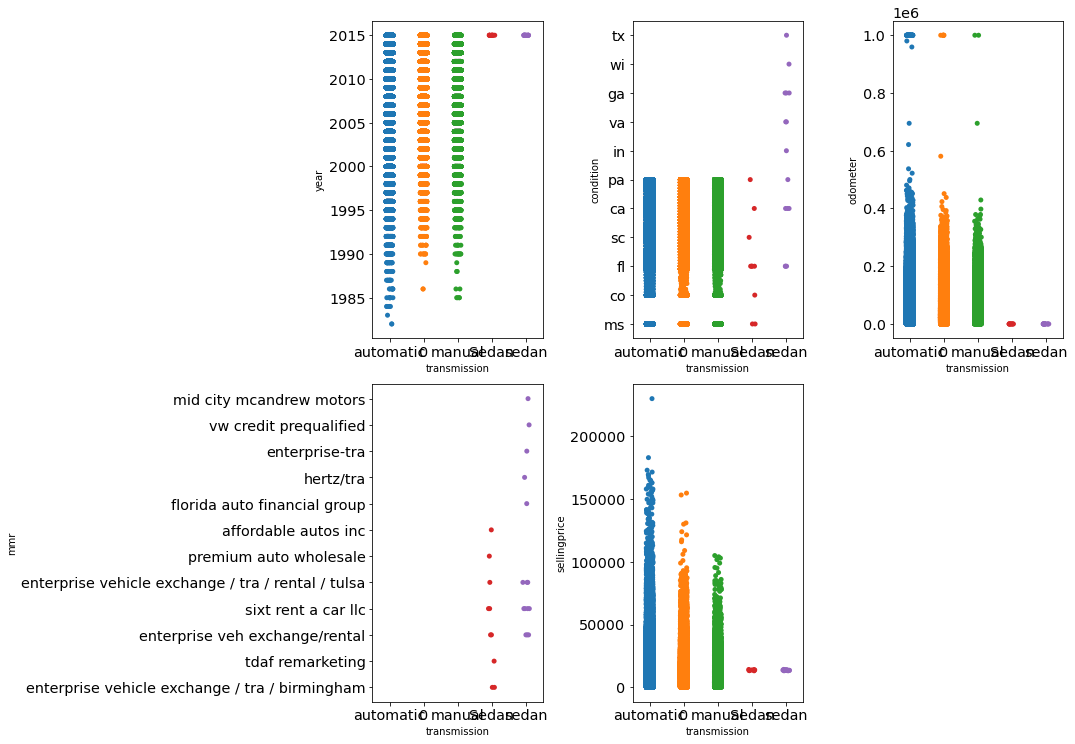

In [74]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='transmission', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout() # layout

    if i != 0: plt.close(i+1) # close figure 

    plt.close(len(nums) + 1) # close figure 

Terlihat bahwa jenis transmission memiliki korelasi dengan kolom mmr dan selling price

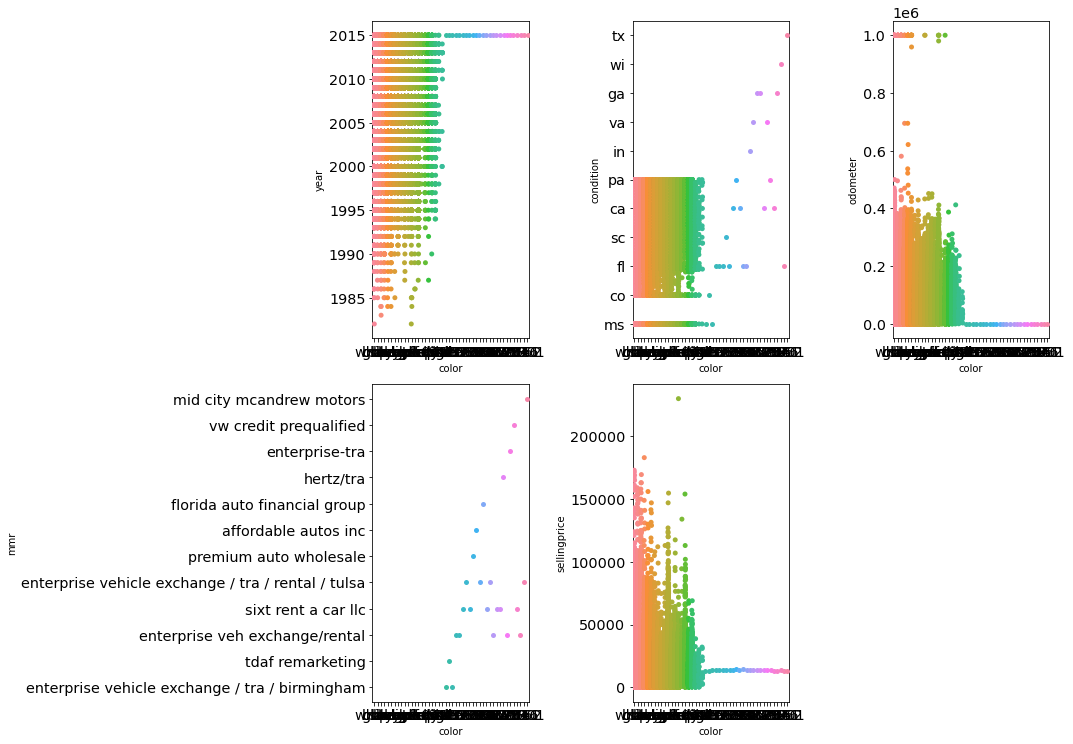

In [75]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='color', y=nums[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

In [76]:
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='make', y=nums[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


ValueError: ignored

<Figure size 864x288 with 0 Axes>

ValueError: ignored

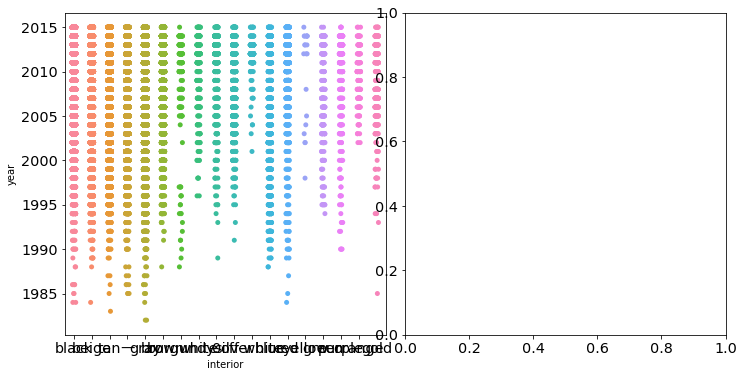

In [77]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='interior', y=nums[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

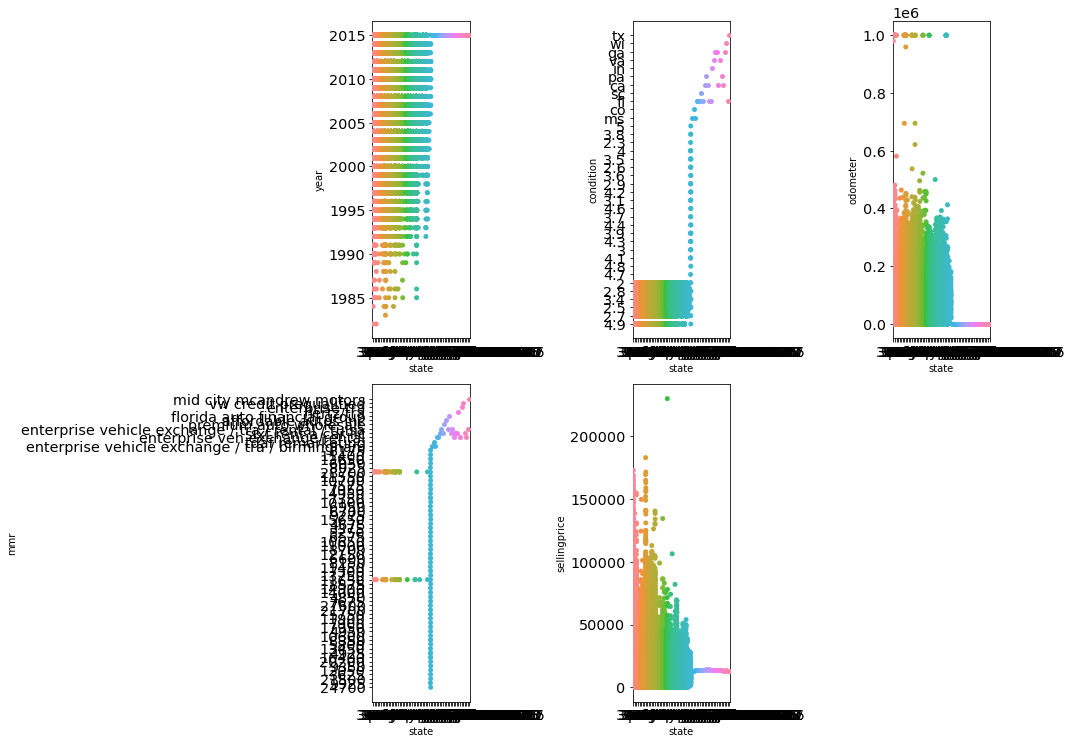

In [78]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='state', y=nums[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

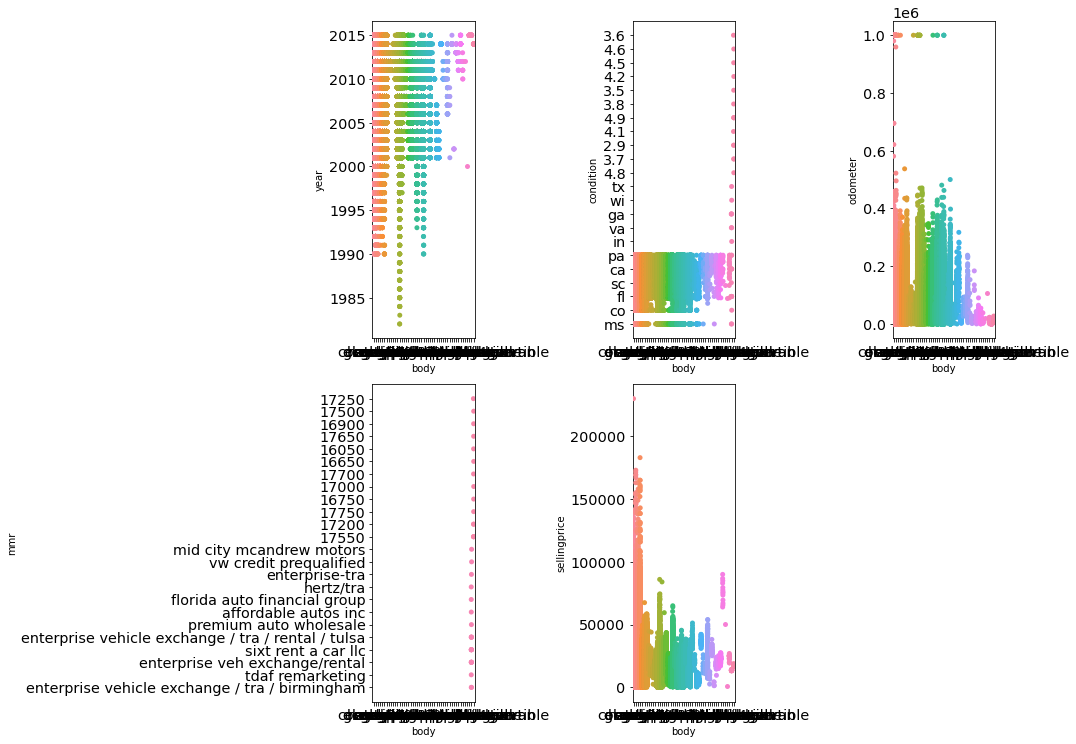

In [79]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='body', y=nums[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

# **EDA Conclusion**

Beberapa hal yang kita temukan dari EDA dataset ini adalah:

* Data terlihat valid dan tidak ada kecacatan
* Namun masih ada data-data yang kosong/hilang, harus diurus ketika preprocessing
* Ada beberapa distribusi yang sedikit *skewed*, hal ini harus diingat apabila kita ingin melakukan sesuatu atau menggunakan model yang memerlukan asumsi distribusi normal
* Beberapa *feature* memiliki korelasi yang jelas dengan target, mereka akan dipakai
* Beberapa *feature* seperti vin, state, interior, trim, seller, mmr terlihat sama sekali tidak berkorelasi, mereka sebaiknya diabaikan

# **Dataset Overview & Business Insight**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Price Segmentation')

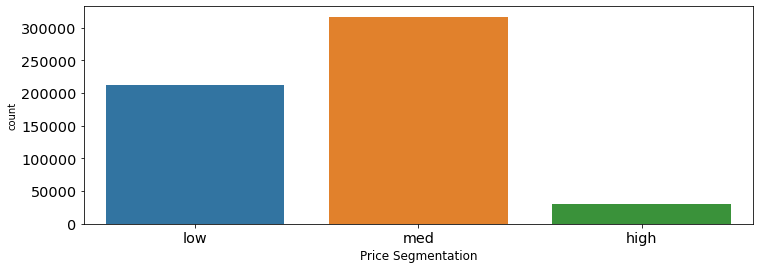

In [80]:
df['pricesegmentation']=np.where(df['sellingprice']<10000,'low',np.where(df['sellingprice']>30000,'high','med'))
order = ['low', 'med', 'high']
sns.countplot(df['pricesegmentation'],order = order)
plt.xlabel('Price Segmentation',fontsize=12)

Dari segmentasi harga dapat disimpulkan bahwa mayoritas penjualan mobil bekas termasuk dalam kategori medium price.

In [81]:
jumlah_warna= df.groupby('color',as_index=False).agg(jumlah=('year','count'))

warna_terbesar= jumlah_warna.query('jumlah>10000')

warna_other= pd.Series(jumlah_warna.query('jumlah<=10000').sum())
warna_other.iloc[0]='other'

warna_gabungan= warna_terbesar.append(warna_other, ignore_index=True)
warna_gabungan.sort_values(by=['jumlah'], inplace=True,ascending=False)
plt.bar(data= warna_gabungan, x='color', height='jumlah',color=['black', 'whitesmoke', 'silver', 'gray', 'blue','red','whitesmoke','whitesmoke','green','gold'])
plt.xlabel('Color',fontsize=12)
plt.ylabel('Jumlah',fontsize=12)
nama = ('black', 'white', 'silver', 'gray', 'blue','red','other','unknown','green','gold')
plt.xticks(warna_gabungan['color'], nama)
ax = plt.axes()
ax.set_facecolor('#0198a3')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


TypeError: ignored

Dari Bar Chart diatas warna yang memiliki banyak peminatnya yaitu warna hitam dengan total 93245. Lalu, di ikuti oleh warna putih dan silver.

ValueError: ignored

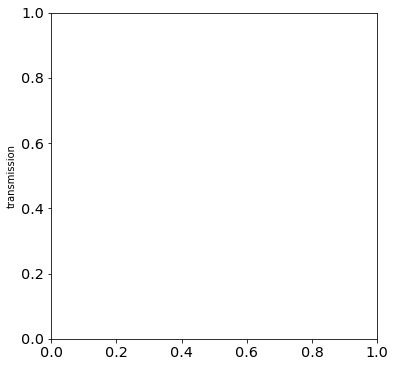

In [82]:
df['transmission'].value_counts().plot.pie(explode=[0.05, 0.5], autopct='%1.1f%%', figsize=(6,6),fontsize=12)
plt.title('Car Transmission',fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.show()

Dilihat dari grafik transmission ini bahwa sebagian besar dari transmisi adalah automatic

In [83]:
df=df.dropna()
df.body = df.body.str.lower()
len(df.body.unique())

body_list=[]

for index,kolom in df.iterrows():
  body=kolom['body']
  if body.endswith('cab')==True:
    bodies= 'cab'
  elif body.startswith('cab')==True:
    bodies= 'cab'
  elif body.endswith('coupe')==True:
    bodies= 'coupe'
  elif body.endswith('koup')==True:
    bodies= 'coupe'
  elif body.endswith('van')==True:
    bodies= 'van'
  elif body.endswith('wagon')==True:
    bodies= 'wagon'
  elif body.endswith('convertible')==True:
    bodies= 'convertible'
  elif body.endswith('suv')==True:
    bodies= 'suv'
  elif body.endswith('sedan')==True:
    bodies= 'sedan'
  elif body.endswith('hatchback')==True:
    bodies= 'hatchback'
  else:
    bodies='others'
  body_list.append(bodies)

df['body']=body_list

AttributeError: ignored

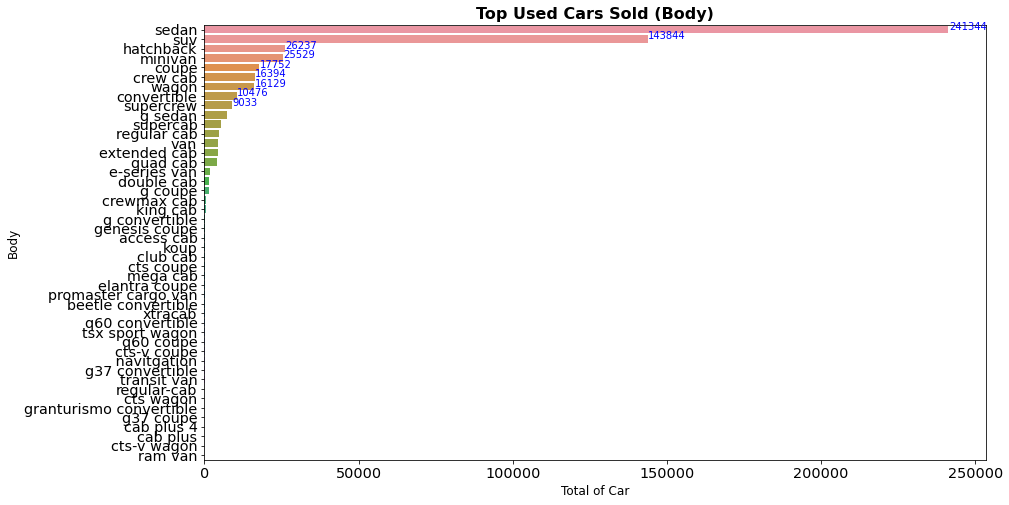

In [84]:
plt.figure(figsize=(14,8))
sns.countplot(y='body', data=df,order=pd.value_counts(df['body']).index)
for i, v in enumerate(pd.value_counts(df['body']).iloc[:9]):
    plt.text(v+100, i, str(v), color='blue')
plt.xlabel('Total of Car',fontsize=12)
plt.ylabel('Body',fontsize=12)
plt.title('Top Used Cars Sold (Body)',fontsize=16, fontweight='bold')
plt.show()

Setelah kolom body distandardize , maka diketahui bahwa konsumen lebih tertarik untuk membeli mobil berjenis sedan jika dibandingkan dengan yang lainnya.

In [85]:
df.make = df.make.str.lower()

def brand_top10list(x):
  if x['make'] == 'ford':
    brand_top10list = 'ford'
  elif x['make'] == 'chevrolet':
    brand_top10list = 'chevrolet'
  elif x['make'] == 'nissan':
    brand_top10list = 'nissan'
  elif x['make'] == 'toyota':
    brand_top10list = 'toyota'
  elif x['make'] == 'dodge':
    brand_top10list = 'dodge'
  elif x['make'] == 'honda':
    brand_top10list = 'honda'
  elif x['make'] == 'hyundai':
    brand_top10list = 'hyundai'
  elif x['make'] == 'bmw':
    brand_top10list = 'bmw'
  elif x['make'] == 'kia':
    brand_top10list = 'kia'
  elif x['make'] == 'chrysler':
    brand_top10list = 'chrysler'
  elif x['make'] == 'infiniti':
    brand_top10list = 'infiniti'
  elif x['make'] == 'mercedes-benz':
    brand_top10list = 'merce'
  elif x['make'] == 'jeep':
    brand_top10list = 'jeep'
  elif x['make'] == 'volkswagen':
    brand_top10list = 'volkswagen'
  elif x['make'] == 'lexus':
    brand_top10list = 'lexus'
  elif x['make'] == 'gmc':
    brand_top10list = 'gmc'
  elif x['make'] == 'mazda':
    brand_top10list = 'mazda'
  elif x['make'] == 'lincoln':
    brand_top10list = 'lincoln'
  elif x['make'] == 'audi':
    brand_top10list = 'audi'
  else:
    brand_top10list = 'others'
  return brand_top10list

df['top_20_brand'] = df.apply(lambda x: brand_top10list(x), axis=1)

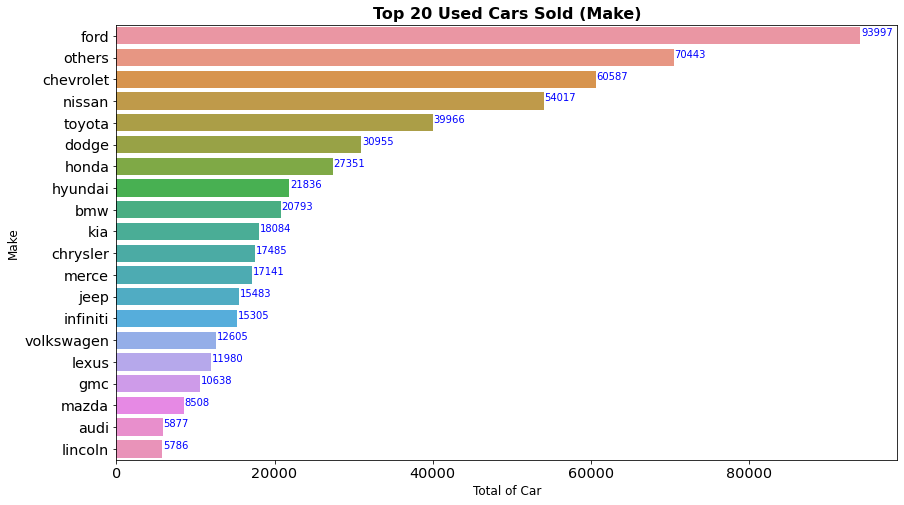

In [86]:
plt.figure(figsize=(14,8))
sns.countplot(y='top_20_brand', data=df,order=pd.value_counts(df['top_20_brand']).index)
for i, v in enumerate(pd.value_counts(df['top_20_brand']).iloc[:20]):
    plt.text(v+100, i, str(v), color='blue')
plt.xlabel('Total of Car',fontsize=12)
plt.ylabel('Make',fontsize=12)
plt.title('Top 20 Used Cars Sold (Make)',fontsize=16, fontweight='bold')
plt.show()

* Dengan mengambil 20 penjualan teratas dari kolom make ke kolom top_20_brand, maka akan memasukan beberapa kategori brand(make) yang memiliki nilai jual tinggi dan penjualan yang cukup banyak. Seperti kategori BMW.
* Dari plot histogram, mengambil 20 brand dengan penjualan terbanyak untuk stage selanjutnya dirasa cukup sesuai, karena jika diambil 10 brand maka akan ada beberapa penjualan yang cukup laris dan memiliki range price low - high masuk kedalam kategori others

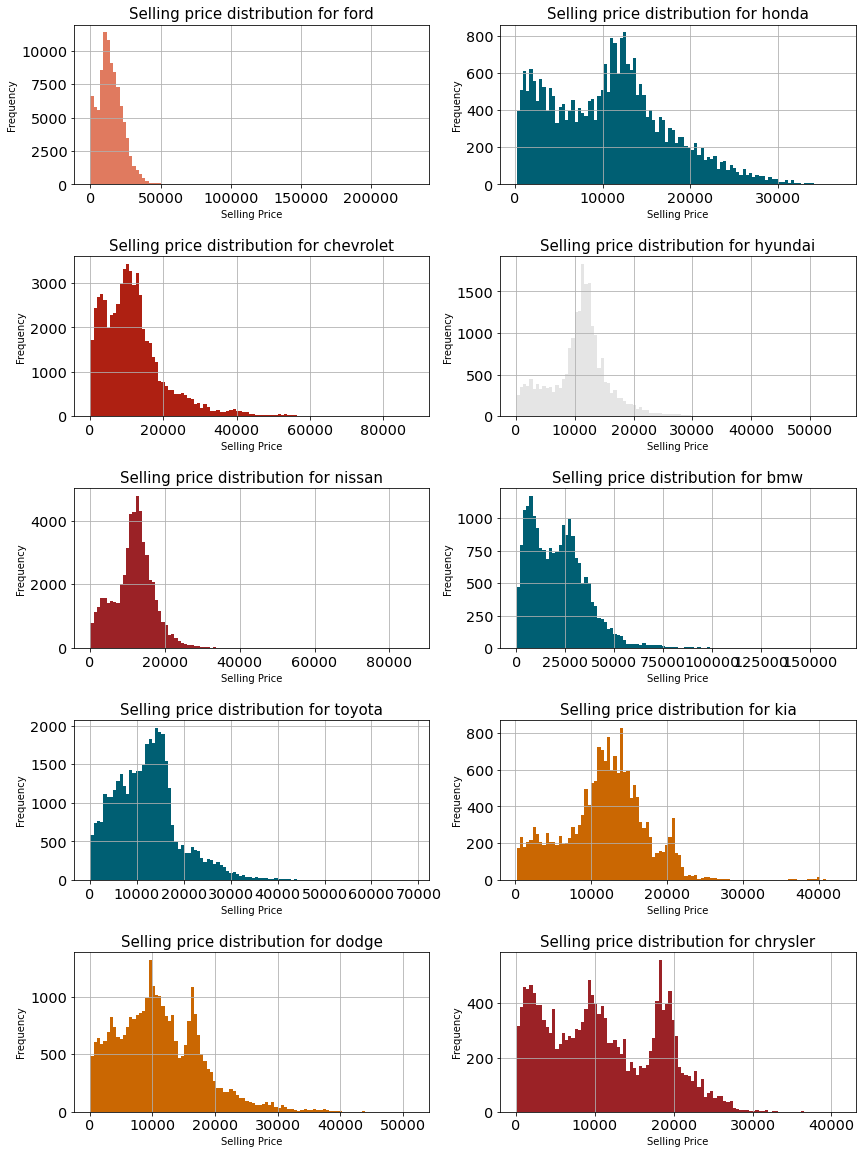

In [87]:
top_make=df['make'].value_counts()[:10].index
fig,ax=plt.subplots(5,2,figsize=(14,20))
color_list=['#0a9396','#ca6702','#ae2012','#9b2226','#001219','#005f73','#94d2bd','#e9d8a6','#e5e5e5','#e07a5f'] #coolors.co
i=0
for t in top_make:
    df.loc[df['make']==t,'sellingprice'].hist(ax=ax[i%5][i//5],bins=100,color=np.random.choice(color_list,replace=False))
    ax[i%5][i//5].set_xlabel('Selling Price',fontsize=10)
    ax[i%5][i//5].set_ylabel('Frequency',fontsize=10)
    ax[i%5][i//5].set_title(f'Selling price distribution for {t}',fontsize=15)
    plt.subplots_adjust(hspace=0.45)
    i+=1

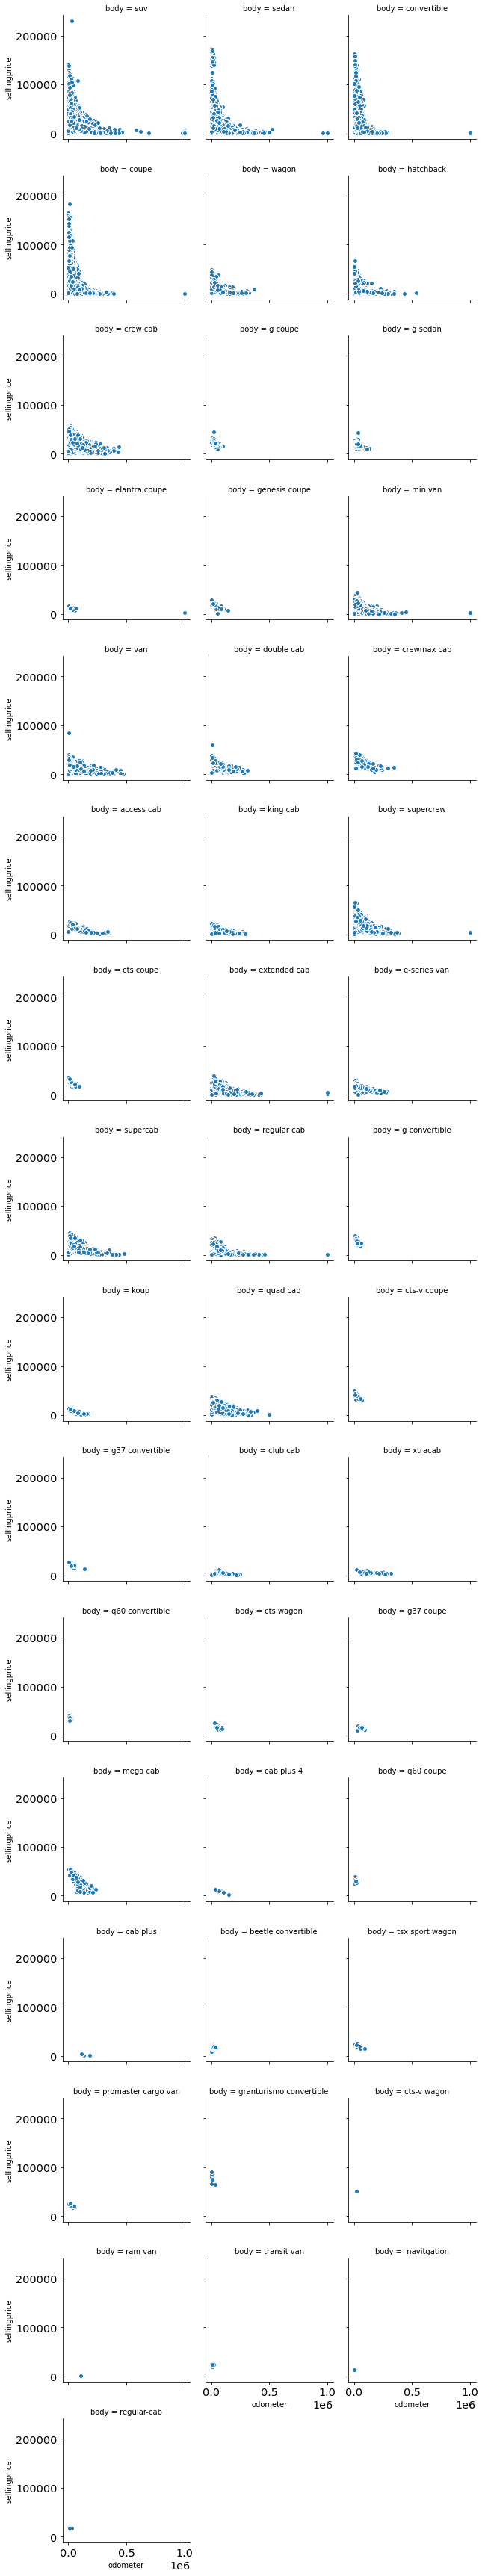

In [88]:
graph = sns.FacetGrid(df, col ="body",col_wrap=3)
graph.map(plt.scatter, "odometer", "sellingprice", edgecolor ="w").add_legend()
plt.show()

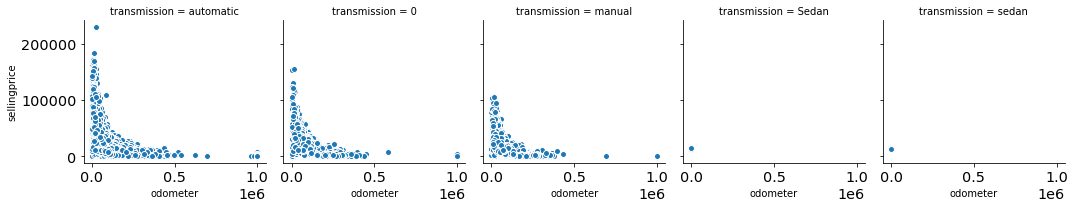

In [89]:
graph = sns.FacetGrid(df, col ="transmission")
graph.map(plt.scatter, "odometer", "sellingprice", edgecolor ="w").add_legend()
plt.show()


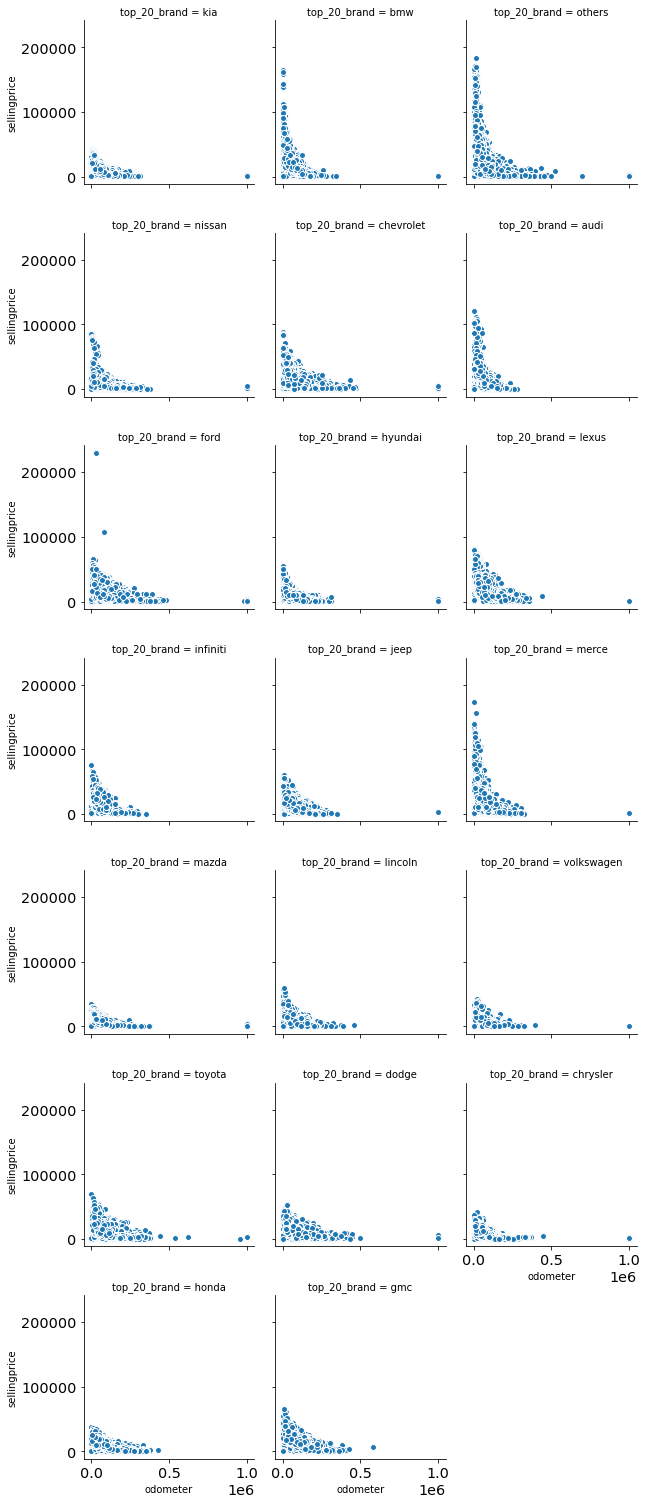

In [90]:
graph = sns.FacetGrid(df, col ="top_20_brand",col_wrap=3)
graph.map(plt.scatter, "odometer", "sellingprice", edgecolor ="w").add_legend()
plt.show()

In [91]:
def drop_val(col):
    idx_to_drop = []
    for i in col.index:
        idx_to_drop.append(i)

    df.drop(idx_to_drop,inplace=True)
    df.reset_index(drop=True,inplace=True)
    
fixed_date = []
for i in range(len(df['saledate'])):
    date = df.saledate[i][:15]
    fixed_date.append(date)
    
df['saledate'] = fixed_date
df['saledate'] = pd.to_datetime(df['saledate'])
date_not_use = df[(df['saledate'] < '2014-12-01')]  # Deleting this data because there aren't enough data for that range of date 
drop_val(date_not_use)    

ParserError: ignored

In [92]:
median_saledate = df.groupby(df['saledate'].dt.strftime('%Y-%m')).median()
plt.figure(figsize=(18,6))
plt.title('Selling Price of Used Car by Month of Year',fontsize=16, fontweight='bold')
sns.pointplot(x=median_saledate.index,y=median_saledate['sellingprice'], data=median_saledate,ci=None)
for i, v in enumerate(median_saledate['sellingprice']):
    if v >= np.median(median_saledate['sellingprice']):
        plt.text(i-0.1, v+500, str(v), color='green', fontweight='bold')
    else:
        plt.text(i-0.1, v-1000, str(v), color='red', fontweight='bold')
                    
plt.axhline(np.median(median_saledate['sellingprice']),color='blue', linestyle='--', label='median')
plt.ylabel ('Selling Price',fontsize=12)
plt.xlabel('Sale Month',fontsize=12)
plt.ylim(0,20000)
plt.legend()
plt.show()

AttributeError: ignored

In [93]:
yr_gb = df.groupby(df['saledate'].dt.strftime('%Y-%m')).count()
plt.figure(figsize=(18,6))
plt.title('Amount Used Car Sold by Month of Year',fontsize=16, fontweight='bold')
sns.pointplot(x=yr_gb.index,y=yr_gb['make'], data=yr_gb,ci=None)
for i, v in enumerate(yr_gb['make']):
    if v >= np.mean(yr_gb['make']):
        plt.text(i-0.1, v+5000, str(v), color='green', fontweight='bold')
    else:
        plt.text(i-0.1, v+5000, str(v), color='red', fontweight='bold')
                    
plt.axhline(np.mean(yr_gb['make']),color='blue', linestyle='--', label='mean')
plt.ylabel ('Total Number of Transaction',fontsize=12)
plt.xlabel('Sale Month',fontsize=12)
plt.ylim(0,200000)
plt.legend()
plt.show()

AttributeError: ignored

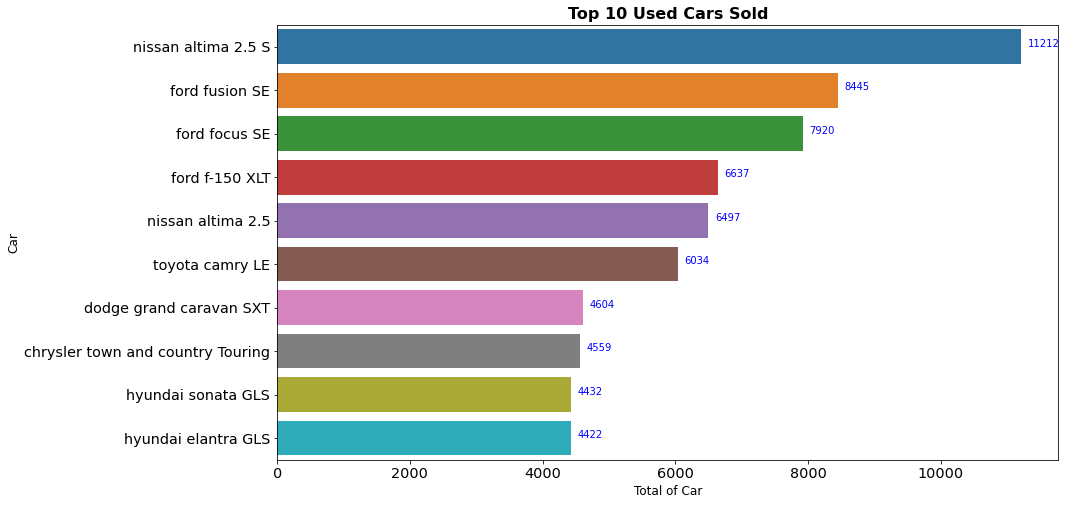

In [94]:
df['combined'] = df['make'].str.cat(df[['model','trim']].astype(str), sep=' ')
plt.figure(figsize=(14,8))
sns.countplot(y='combined',data=df,order=pd.value_counts(df['combined']).iloc[:10].index)
for i, v in enumerate(pd.value_counts(df['combined']).iloc[:10]):
    plt.text(v+100, i, str(v), color='blue')
plt.xlabel('Total of Car',fontsize=12)
plt.ylabel('Car',fontsize=12)
plt.title('Top 10 Used Cars Sold',fontsize=16, fontweight='bold')
plt.show()

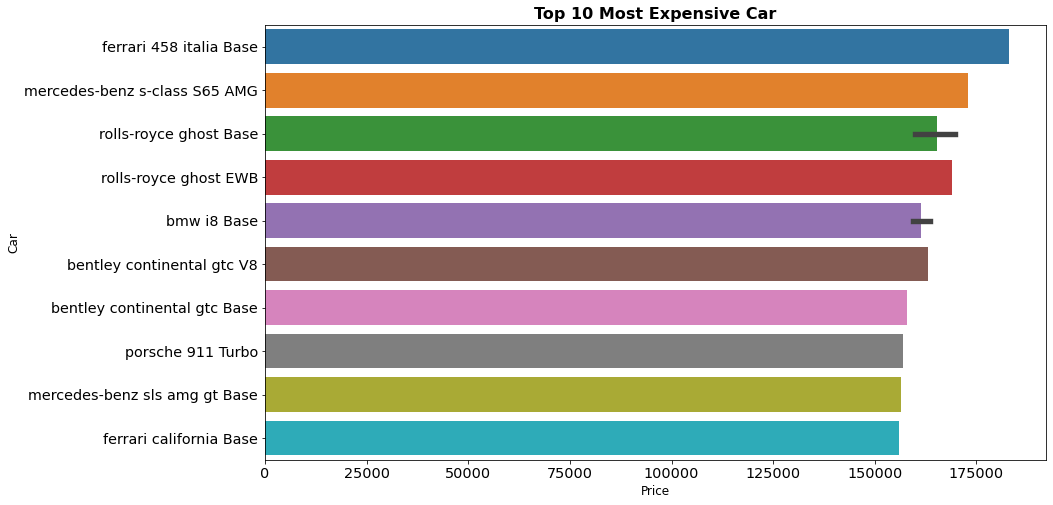

In [95]:
df_sort=df.sort_values(by='sellingprice',ascending=False,ignore_index=True)
df_sort=df_sort.iloc[1:20]
plt.figure(figsize=(14,8))
sns.barplot(y='combined',x='sellingprice',data=df_sort)
plt.xlabel('Price',fontsize=12)
plt.ylabel('Car',fontsize=12)
plt.title('Top 10 Most Expensive Car',fontsize=16, fontweight='bold')
plt.show()

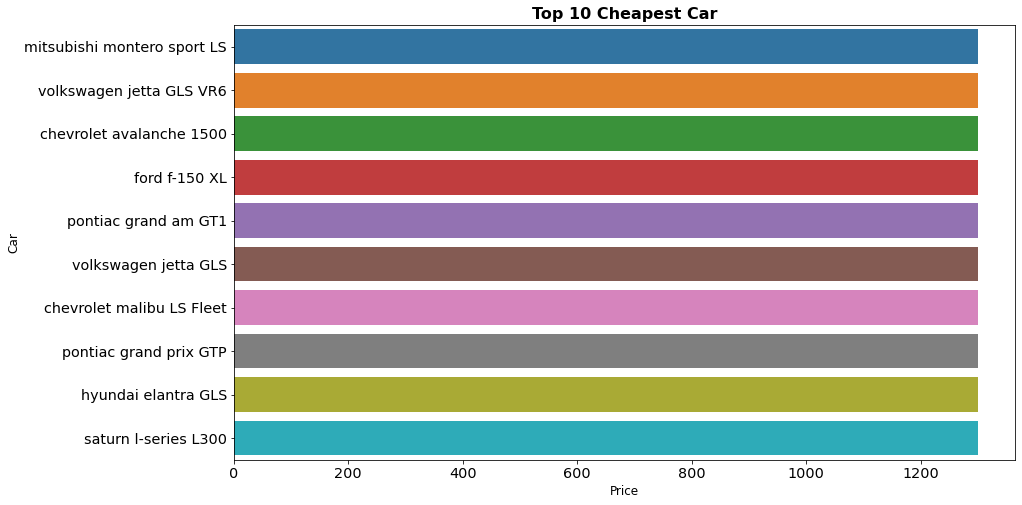

In [96]:
df_sort=df.sort_values(by='sellingprice',ascending=True,ignore_index=True)
df_sort=df_sort[~(df_sort['sellingprice'] < 1300) ]
df_sort=df_sort.iloc[:10]
plt.figure(figsize=(14,8))
sns.barplot(y='combined',x='sellingprice',data=df_sort)
plt.xlabel('Price',fontsize=12)
plt.ylabel('Car',fontsize=12)
plt.title('Top 10 Cheapest Car',fontsize=16, fontweight='bold')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


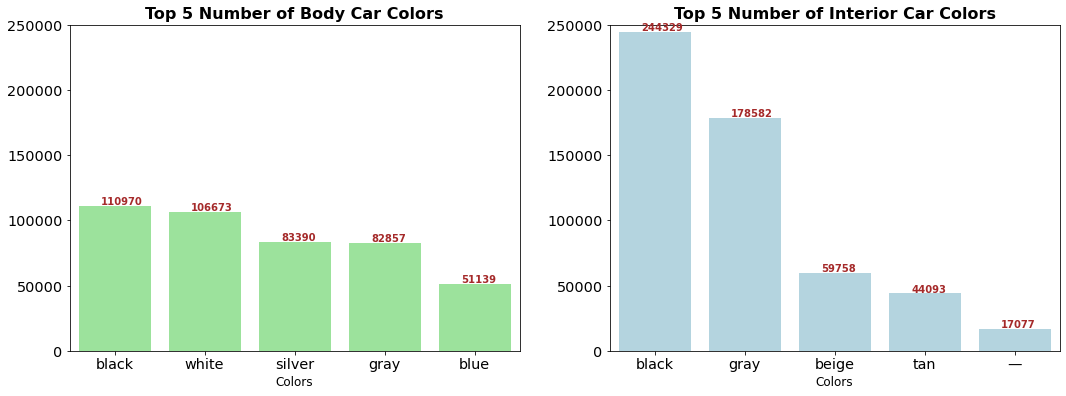

In [97]:
fig, ax =plt.subplots(1,2, figsize=(10,6))
sns.barplot(df['color'].value_counts().iloc[:5].index,df['color'].value_counts().iloc[:5],color='lightgreen', ax=ax[0])
for i, v in enumerate(df['color'].value_counts().iloc[:5]):
    ax[0].text(i-0.15, v+1000, str(v), color='brown', fontweight='bold')
sns.barplot(df['interior'].value_counts().iloc[:5].index,df['interior'].value_counts().iloc[:5],color='lightblue', ax=ax[1])
for i, v in enumerate(df['interior'].value_counts().iloc[:5]):
    ax[1].text(i-0.15, v+1000, str(v), color='brown', fontweight='bold')
ax[0].set_title('Top 5 Number of Body Car Colors',fontsize = 16, fontweight='bold')
ax[0].set_xlabel('Colors',fontsize = 12)
ax[0].set_ylabel(None)
ax[1].set_title('Top 5 Number of Interior Car Colors',fontsize = 16, fontweight='bold')
ax[1].set_xlabel('Colors',fontsize = 12)
ax[1].set_ylabel(None)
ax[0].set_ylim(0,250000)
ax[1].set_ylim(0,250000)
fig.show()

plt.subplots_adjust(right = 1.5)

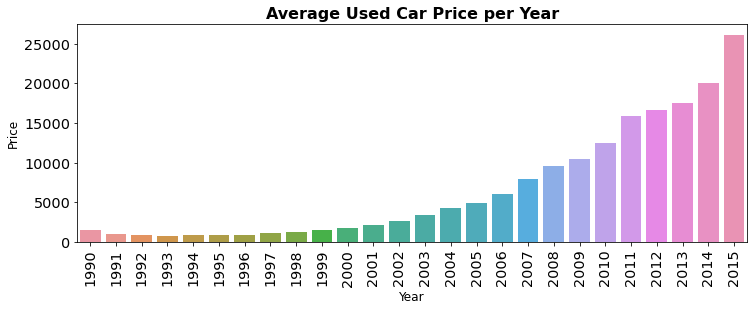

In [98]:
df_clean=df.dropna()
df_groupby=df_clean.groupby(by='year').mean().reset_index()
sns.barplot(x='year',y='sellingprice',data=df_groupby)
plt.xticks(rotation=90)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.title('Average Used Car Price per Year',fontsize=16, fontweight='bold')
plt.show();

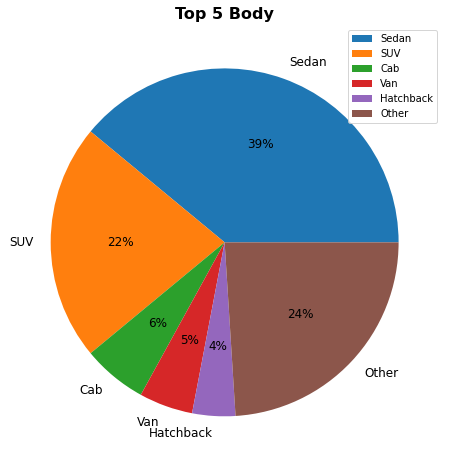

In [99]:
dfbody = pd.DataFrame({'Percentage': [39,22,6,5,4,24]},
                  index=['Sedan', 'SUV',
                              'Cab', 'Van','Hatchback','Other'])
dfbody.plot.pie(y='Percentage', autopct='%1.0f%%', figsize=(8,8),fontsize=12)
plt.title('Top 5 Body',fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.show()

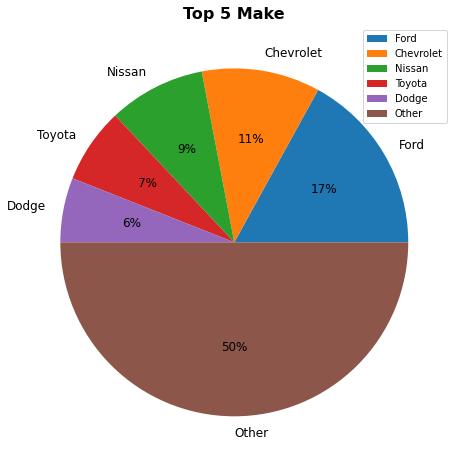

In [100]:
dfmake = pd.DataFrame({'Percentage': [17,11,9,7,6,50]},
                  index=['Ford', 'Chevrolet',
                              'Nissan', 'Toyota','Dodge','Other'])
dfmake.plot.pie(y='Percentage', autopct='%1.0f%%', figsize=(8,8),fontsize=12)
plt.title('Top 5 Make',fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.show()

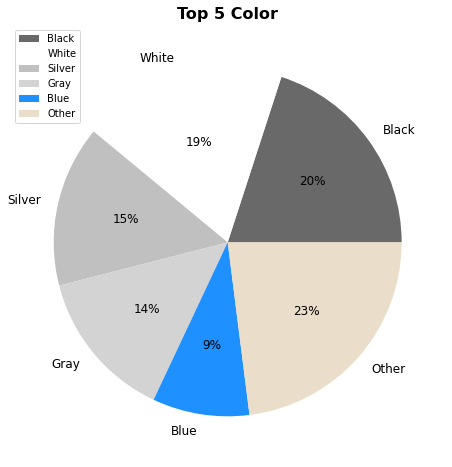

In [101]:
dfcolor = pd.DataFrame({'Percentage': [20,19,15,14,9,23]},
                  index=['Black', 'White',
                              'Silver', 'Gray','Blue','Other'])
colors = ['#696969', '#FFFFFF', '#C0C0C0', '#d3d3d3','#1e90ff','#EADDCA']
dfcolor.plot.pie(y='Percentage', autopct='%1.0f%%', figsize=(8,8),fontsize=12,colors=colors)
plt.title('Top 5 Color',fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.show()

# **Stage 2 Final Project - Data Pre-processing**

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Mengubah parameter default matplotlib**

In [106]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# **Load dataset**

In [107]:
df = pd.read_csv("car_prices.csv")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8,13,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Unnamed: 16
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),NaN
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),NaN
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),NaN


In [108]:
#Drop Kolom yang tidak di pakai
df.drop(['vin','state', 'interior', 'trim', 'seller', 'mmr'], inplace=True, axis=1)

In [109]:
df.head()

,year,make,model,body,transmission,condition,odometer,color,sellingprice,saledate,Unnamed: 16
0,2015,Kia,Sorento,SUV,automatic,5.0,16639.0,white,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
1,2015,Kia,Sorento,SUV,automatic,5.0,9393.0,white,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
2,2014,BMW,3 Series,Sedan,automatic,4.5,1331.0,gray,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),NaN
3,2015,Volvo,S60,Sedan,automatic,4.1,14282.0,white,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),NaN
4,2014,BMW,6 Series Gran Coupe,Sedan,automatic,4.3,2641.0,gray,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),NaN


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   body          545642 non-null  object 
 4   transmission  493484 non-null  object 
 5   condition     547043 non-null  object 
 6   odometer      558743 non-null  float64
 7   color         558088 non-null  object 
 8   sellingprice  558837 non-null  int64  
 9   saledate      558837 non-null  object 
 10  Unnamed: 16   25 non-null      object 
dtypes: float64(1), int64(2), object(8)
memory usage: 46.9+ MB


In [111]:
cats = ['make', 'model', 'body', 'transmission','color','saledate']
nums = ['year', 'condition', 'odometer', 'sellingprice']

In [112]:
df[nums].describe()

,year,odometer,sellingprice
count,558837.000000,558743.000000,558837.000000
mean,2010.038927,68320.025256,13611.270884
std,3.966864,53398.533625,9749.431107
min,1982.000000,1.000000,1.000000
25%,2007.000000,28371.000000,6900.000000
50%,2012.000000,52254.000000,12100.000000
75%,2013.000000,99109.000000,18200.000000
max,2015.000000,999999.000000,230000.000000


In [113]:
df.sort_values(by='sellingprice')

,year,make,model,body,transmission,condition,odometer,color,sellingprice,saledate,Unnamed: 16
7566,2002,Ford,F-350 Super Duty,Crew Cab,NaN,2.0,NaN,white,1,Thu Feb 05 2015 04:00:00 GMT-0800 (PST),NaN
48453,2003,Mercedes-Benz,E-Class,Sedan,automatic,2.1,1.0,black,1,Tue Jan 06 2015 09:30:00 GMT-0800 (PST),NaN
293223,2014,Ford,E-Series Van,E-Series Van,automatic,4.1,31886.0,white,1,Thu Feb 12 2015 03:00:00 GMT-0800 (PST),NaN
348252,1995,Isuzu,Rodeo,SUV,NaN,1.0,254132.0,red,1,Wed Mar 04 2015 01:05:00 GMT-0800 (PST),NaN
502080,2002,Ford,Taurus,sedan,NaN,1.9,132230.0,silver,100,Fri Jun 05 2015 02:00:00 GMT-0700 (PDT),NaN
...,...,...,...,...,...,...,...,...,...,...,...
125095,2012,Rolls-Royce,Ghost,Sedan,automatic,4.5,14316.0,black,169500,Wed Jan 14 2015 01:40:00 GMT-0800 (PST),NaN
545523,2013,Rolls-Royce,Ghost,sedan,automatic,4.2,7852.0,white,171500,Wed Jun 17 2015 03:05:00 GMT-0700 (PDT),NaN
446949,2015,Mercedes-Benz,S-Class,Sedan,automatic,4.1,5277.0,white,173000,Thu May 21 2015 05:00:00 GMT-0700 (PDT),NaN
548169,2011,Ferrari,458 Italia,coupe,automatic,4.6,12116.0,red,183000,Wed Jun 17 2015 03:40:00 GMT-0700 (PDT),NaN


In [114]:
df[cats].describe()

,make,model,body,transmission,color,saledate
count,548536,548438,545642,493484,558088,558837
unique,96,973,87,4,45,3765
top,Ford,Altima,Sedan,automatic,black,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,199438,475915,110970,5334


# **Missing Data**

In [115]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

Unnamed: 16     99.995526
transmission    11.694465
body             2.361154
condition        2.110454
model            1.860829
make             1.843292
color            0.134028
odometer         0.016821
year             0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64

In [116]:
df=df.dropna()

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 417835 to 554710
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          25 non-null     int64  
 1   make          25 non-null     object 
 2   model         25 non-null     object 
 3   body          25 non-null     object 
 4   transmission  25 non-null     object 
 5   condition     25 non-null     object 
 6   odometer      25 non-null     float64
 7   color         25 non-null     object 
 8   sellingprice  25 non-null     int64  
 9   saledate      25 non-null     object 
 10  Unnamed: 16   25 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.3+ KB


In [118]:
df.isna().sum()

year            0
make            0
model           0
body            0
transmission    0
condition       0
odometer        0
color           0
sellingprice    0
saledate        0
Unnamed: 16     0
dtype: int64

In [119]:
df[nums].describe()

,year,odometer,sellingprice
count,25.0,25.000000,25.000000
mean,2015.0,3.340000,13684.000000
std,0.0,1.389544,313.155978
min,2015.0,1.000000,13200.000000
25%,2015.0,2.000000,13500.000000
50%,2015.0,3.800000,13650.000000
75%,2015.0,4.600000,13900.000000
max,2015.0,5.000000,14300.000000


# **Duplicated Data**

In [120]:
df.duplicated().sum()

0

Kolom Make (Brand)

In [121]:
df.make.unique()

array(['Volkswagen'], dtype=object)

In [122]:
df.make = df.make.str.lower()

In [123]:
len(df.make.unique())

1

In [124]:
df['make'].value_counts()

volkswagen    25
Name: make, dtype: int64

In [125]:
def brand_top10list(x):
  if x['make'] == 'ford':
    brand_top10list = 'ford'
  elif x['make'] == 'chevrolet':
    brand_top10list = 'chevrolet'
  elif x['make'] == 'nissan':
    brand_top10list = 'nissan'
  elif x['make'] == 'toyota':
    brand_top10list = 'toyota'
  elif x['make'] == 'dodge':
    brand_top10list = 'dodge'
  elif x['make'] == 'honda':
    brand_top10list = 'honda'
  elif x['make'] == 'hyundai':
    brand_top10list = 'hyundai'
  elif x['make'] == 'bmw':
    brand_top10list = 'bmw'
  elif x['make'] == 'kia':
    brand_top10list = 'kia'
  elif x['make'] == 'chrysler':
    brand_top10list = 'chrysler'
  elif x['make'] == 'infiniti':
    brand_top10list = 'infiniti'
  elif x['make'] == 'mercedes-benz':
    brand_top10list = 'merce'
  elif x['make'] == 'jeep':
    brand_top10list = 'jeep'
  elif x['make'] == 'volkswagen':
    brand_top10list = 'volkswagen'
  elif x['make'] == 'lexus':
    brand_top10list = 'lexus'
  elif x['make'] == 'gmc':
    brand_top10list = 'gmc'
  elif x['make'] == 'mazda':
    brand_top10list = 'mazda'
  elif x['make'] == 'lincoln':
    brand_top10list = 'lincoln'
  elif x['make'] == 'audi':
    brand_top10list = 'audi'
  else:
    brand_top10list = 'others'
  return brand_top10list

In [126]:
df['top_20_brand'] = df.apply(lambda x: brand_top10list(x), axis=1)
df.head(5)

,year,make,model,body,transmission,condition,odometer,color,sellingprice,saledate,Unnamed: 16,top_20_brand
417835,2015,volkswagen,Jetta,Navitgation,Sedan,ms,1.0,9410,13300,10500,Thu May 07 2015 05:01:00 GMT-0700 (PDT),volkswagen
421289,2015,volkswagen,Jetta,Navitgation,Sedan,co,4.6,1167,13200,12700,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT),volkswagen
424161,2015,volkswagen,Jetta,Navitgation,Sedan,ms,1.0,2172,14050,8250,Thu May 14 2015 05:01:00 GMT-0700 (PDT),volkswagen
427040,2015,volkswagen,Jetta,Navitgation,Sedan,fl,4.1,14872,13700,14300,Tue Jun 02 2015 02:15:00 GMT-0700 (PDT),volkswagen
427043,2015,volkswagen,Jetta,Navitgation,Sedan,fl,4.9,12655,13850,14500,Tue May 26 2015 02:15:00 GMT-0700 (PDT),volkswagen


Setelah proses data duplikat, kolom make memiliki nilai unik sebesar 53. Nilai ini berisi merek setiap mobil, dilihat dari banyak penjualan, merek ford menjadi yang tertinggi dalam penjualannya sementara lotus terendah.

Untuk kolom make bisa di drop dan digantikan dengan kolom top_20_brand

Kolom Model

In [127]:
df.model.unique()

array(['Jetta'], dtype=object)

In [128]:
len(df.model.unique())

1

Untuk kolom model bisa di drop, karena nilai unique yang terlalu banyak

In [129]:
#drop kolom model
df.drop(['model'], inplace=True, axis=1)

In [130]:
#tipe kategori diperbarui setelah kolom model drop
cats = ['make', 'body', 'transmission','color','saledate']

In [131]:
df.body.unique()

array([' Navitgation'], dtype=object)

In [132]:
len(df.body.unique())

1

In [133]:
df.body = df.body.str.lower()
len(df.body.unique())

1

In [134]:
df.body.unique()

array([' navitgation'], dtype=object)

In [135]:
body_list=[]

for index,kolom in df.iterrows():
  body=kolom['body']
  if body.endswith('cab')==True:
    bodies= 'cab'
  elif body.startswith('cab')==True:
    bodies= 'cab'
  elif body.endswith('coupe')==True:
    bodies= 'coupe'
  elif body.endswith('koup')==True:
    bodies= 'coupe'
  elif body.endswith('van')==True:
    bodies= 'van'
  elif body.endswith('wagon')==True:
    bodies= 'wagon'
  elif body.endswith('convertible')==True:
    bodies= 'convertible'
  elif body.endswith('suv')==True:
    bodies= 'suv'
  elif body.endswith('sedan')==True:
    bodies= 'sedan'
  elif body.endswith('hatchback')==True:
    bodies= 'hatchback'
  else:
    bodies='others'
  body_list.append(bodies)

df['body']=body_list

In [136]:
df['body'].unique()

array(['others'], dtype=object)

Menghapus baris - baris yang memiliki nilai tidak sesuai

In [137]:
df.loc[df['sellingprice']==1]

,year,make,body,transmission,condition,odometer,color,sellingprice,saledate,Unnamed: 16,top_20_brand


In [138]:
df=df[ ~(df['sellingprice'] == 1) ]
#Terdapat 2 data yang memiliki nilai sellingprice weird, maka bisa di drop

In [139]:
df.describe()

,year,odometer,sellingprice
count,25.0,25.000000,25.000000
mean,2015.0,3.340000,13684.000000
std,0.0,1.389544,313.155978
min,2015.0,1.000000,13200.000000
25%,2015.0,2.000000,13500.000000
50%,2015.0,3.800000,13650.000000
75%,2015.0,4.600000,13900.000000
max,2015.0,5.000000,14300.000000


In [140]:
df.sort_values(by='sellingprice')

,year,make,body,transmission,condition,odometer,color,sellingprice,saledate,Unnamed: 16,top_20_brand
421289,2015,volkswagen,others,Sedan,co,4.6,1167,13200,12700,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT),volkswagen
529622,2015,volkswagen,others,sedan,ga,4.1,18561,13200,13100,Thu Jun 11 2015 03:00:00 GMT-0700 (PDT),volkswagen
551222,2015,volkswagen,others,sedan,fl,2.0,9562,13200,12100,Mon Jun 15 2015 17:00:00 GMT-0700 (PDT),volkswagen
417835,2015,volkswagen,others,Sedan,ms,1.0,9410,13300,10500,Thu May 07 2015 05:01:00 GMT-0700 (PDT),volkswagen
529013,2015,volkswagen,others,sedan,ca,5.0,5705,13400,15250,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT),volkswagen
554710,2015,volkswagen,others,sedan,tx,4.8,5001,13400,13600,Thu Jun 18 2015 04:00:00 GMT-0700 (PDT),volkswagen
501455,2015,volkswagen,others,sedan,va,3.8,9837,13500,12900,Thu Jun 11 2015 02:20:00 GMT-0700 (PDT),volkswagen
497011,2015,volkswagen,others,sedan,fl,4.8,18384,13550,13500,Tue Jun 02 2015 02:15:00 GMT-0700 (PDT),volkswagen
548784,2015,volkswagen,others,sedan,wi,2.0,2846,13600,7500,Wed Jun 17 2015 04:30:00 GMT-0700 (PDT),volkswagen
505306,2015,volkswagen,others,sedan,ga,4.2,20627,13600,13500,Thu Jun 04 2015 03:00:00 GMT-0700 (PDT),volkswagen


In [141]:
odo_1 = df.loc[df['odometer'] == 1]

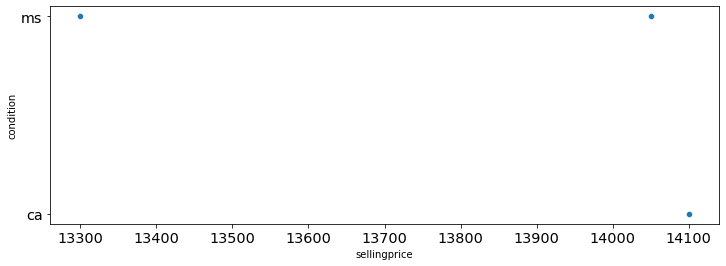

In [142]:
sns.scatterplot(x='sellingprice', y='condition', data = odo_1)

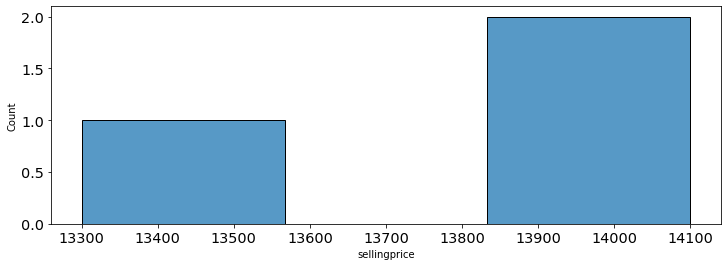

In [143]:
sns.histplot(x = 'sellingprice', data=odo_1)

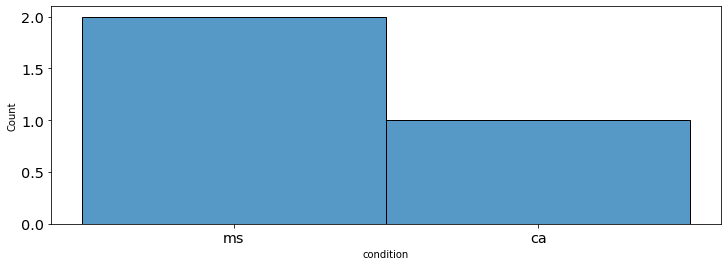

In [144]:
sns.histplot(x = 'condition', data=odo_1)

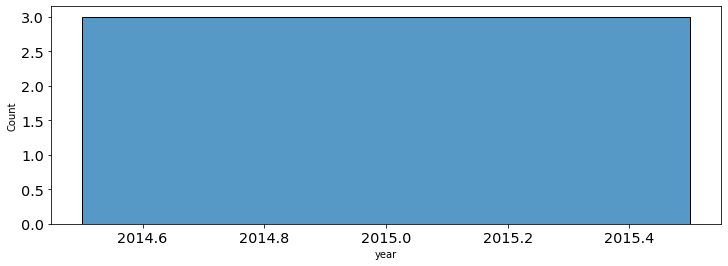

In [145]:
sns.histplot(x='year', data = odo_1)

Data dengan nilai odometer 1 terdapat 2 kemungkinan

1. Sama saja seperti mobil baru yang setelah dibeli dan hanya di lakukan test drive saja, maka harga selling price tidak akan turun jauh dari harga asli. Selain itu secara awam, dengan odometer rendah maka kolom condition harusnya menunjukan rating >3.5 dan tahun keluaran mobil tersebut dapat mempengaruhi besar selling price
2. Odometer sudah melewati nilai max (999999) sehingga nilai odometer kembali ke 1 maka akan linear dengan kondisi, yang dimana kondisi cukup tidak baik dari fisik ataupun mesin (condition = 1-3)
Dilihat dari ketiga plot, maka dapat dilakukan drop dengan rows yang memiliki syarat odometer 1, selling price yang weird (harga mobil bekas tidak mungkin < 1300)

In [146]:
odo_1.groupby(['year']).agg({'sellingprice' : ['min', 'max']})

sellingprice       
              min    max
year                    
2015        13300  14100

In [147]:
df=df[ ~(df['sellingprice'] < 1300) ]

In [148]:
df.describe()

,year,odometer,sellingprice
count,25.0,25.000000,25.000000
mean,2015.0,3.340000,13684.000000
std,0.0,1.389544,313.155978
min,2015.0,1.000000,13200.000000
25%,2015.0,2.000000,13500.000000
50%,2015.0,3.800000,13650.000000
75%,2015.0,4.600000,13900.000000
max,2015.0,5.000000,14300.000000


In [149]:
df.loc[df['sellingprice'] > 25000]

,year,make,body,transmission,condition,odometer,color,sellingprice,saledate,Unnamed: 16,top_20_brand


In [150]:
df.color.unique()

array(['9410', '1167', '2172', '14872', '12655', '15719', '6388', '16633',
       '11034', '2711', '6864', '339', '18384', '9887', '9837', '20379',
       '20627', '721', '6158', '2817', '5705', '18561', '2846', '9562',
       '5001'], dtype=object)

# **Outliers**

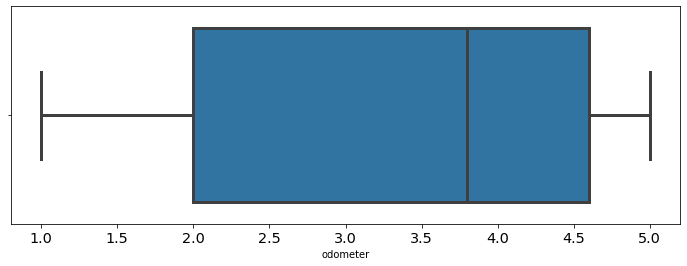

In [151]:
sns.boxplot(x=df['odometer'])

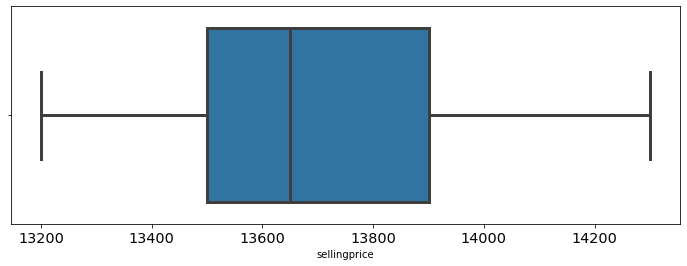

In [152]:
sns.boxplot(x=df['sellingprice'])

Dari boxplot diatas menunjukkan adanya outliers pada kolom odometer dan sellingprice, namun odometer dan sellingprice memberikan pengaruh kepada keseluruhan data, jadi outliers pada kolom tersebut tidak dihapus.

In [153]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['odometer', 'sellingprice']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 25
Jumlah baris setelah memfilter outlier: 25


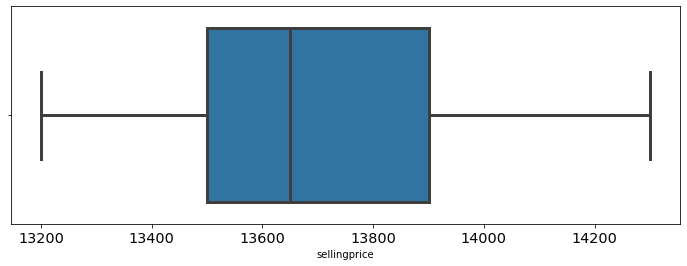

In [154]:
sns.boxplot(x=df['sellingprice'])

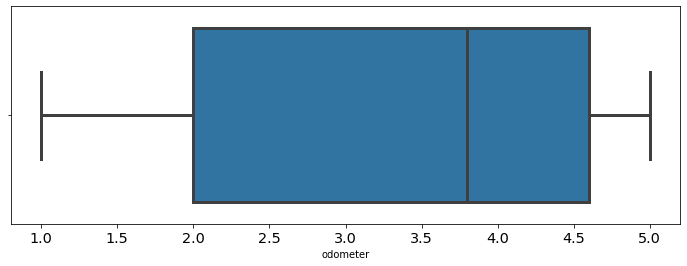

In [155]:
sns.boxplot(x=df['odometer'])

# **Normalization/Standardization**

In [156]:
df.describe()

,year,odometer,sellingprice
count,25.0,25.000000,25.000000
mean,2015.0,3.340000,13684.000000
std,0.0,1.389544,313.155978
min,2015.0,1.000000,13200.000000
25%,2015.0,2.000000,13500.000000
50%,2015.0,3.800000,13650.000000
75%,2015.0,4.600000,13900.000000
max,2015.0,5.000000,14300.000000


In [157]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df['year_std'] = StandardScaler().fit_transform(df['year'].values.reshape(len(df), 1))
df['condition_std'] = StandardScaler().fit_transform(df['condition'].values.reshape(len(df), 1))
df['odometer_std'] = StandardScaler().fit_transform(df['odometer'].values.reshape(len(df), 1))
df['sellingprice_std'] = StandardScaler().fit_transform(df['sellingprice'].values.reshape(len(df), 1))

ValueError: ignored

In [158]:
df.describe()

,year,odometer,sellingprice,year_std
count,25.0,25.000000,25.000000,25.0
mean,2015.0,3.340000,13684.000000,0.0
std,0.0,1.389544,313.155978,0.0
min,2015.0,1.000000,13200.000000,0.0
25%,2015.0,2.000000,13500.000000,0.0
50%,2015.0,3.800000,13650.000000,0.0
75%,2015.0,4.600000,13900.000000,0.0
max,2015.0,5.000000,14300.000000,0.0


# **Feature Encoding**

In [159]:
df['transmission_label'] = df['transmission'].astype('category').cat.codes
df['make_label'] = df['top_20_brand'].astype('category').cat.codes
df['body_label'] = df['body'].astype('category').cat.codes
df['color_label'] = df['color'].astype('category').cat.codes

In [160]:
df.head()

,year,make,body,transmission,condition,odometer,color,sellingprice,saledate,Unnamed: 16,top_20_brand,year_std,transmission_label,make_label,body_label,color_label
417835,2015,volkswagen,others,Sedan,ms,1.0,9410,13300,10500,Thu May 07 2015 05:01:00 GMT-0700 (PDT),volkswagen,0.0,0,0,0,21
421289,2015,volkswagen,others,Sedan,co,4.6,1167,13200,12700,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT),volkswagen,0.0,0,0,0,1
424161,2015,volkswagen,others,Sedan,ms,1.0,2172,14050,8250,Thu May 14 2015 05:01:00 GMT-0700 (PDT),volkswagen,0.0,0,0,0,10
427040,2015,volkswagen,others,Sedan,fl,4.1,14872,13700,14300,Tue Jun 02 2015 02:15:00 GMT-0700 (PDT),volkswagen,0.0,0,0,0,3
427043,2015,volkswagen,others,Sedan,fl,4.9,12655,13850,14500,Tue May 26 2015 02:15:00 GMT-0700 (PDT),volkswagen,0.0,0,0,0,2


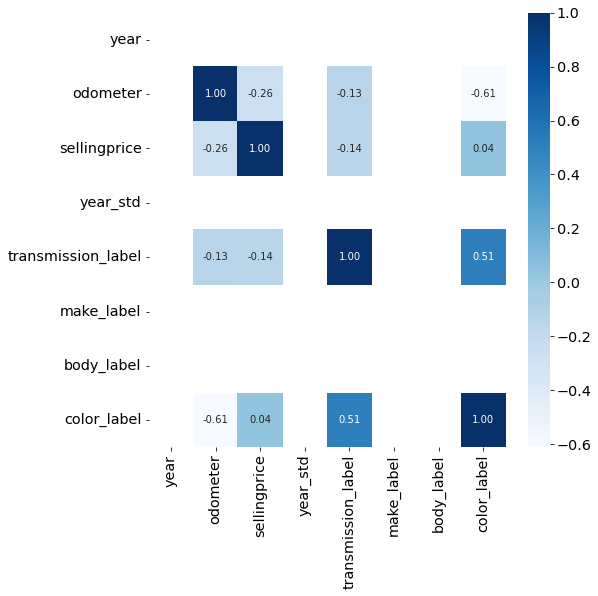

In [161]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

# **Imbalanced Dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


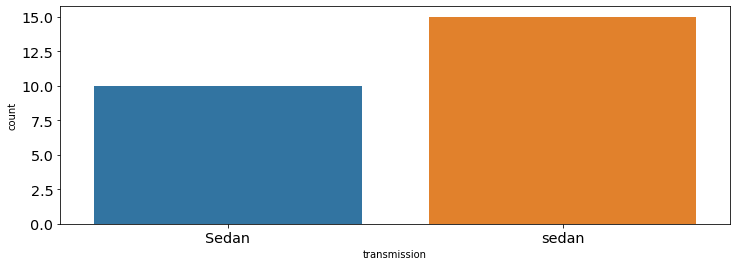

In [162]:
sns.countplot(df['transmission'])

kolom transmisi secara keseluruhan mengandung value automatic. hanya terdapat beberapa mobil saja yang memiliki transmisi manual, bahwasanya tidak memiliki pengaruh yang signifikan terhadap dataset. Dalam hal ini, kelompok kami memutuskan untuk tidak mengikutsertakan kolom transmisi kedalam model yang akan dibuat

# **Stage 3 Final Project - Machine Learning Modeling & Evaluation**

# **Split Train & Test**

In [163]:
x = df.drop(columns=['sellingprice','year','make','body','transmission','transmission_label','condition','odometer','color','saledate','top_20_brand']) # menggunakan semua feature kecuali target
y = df['sellingprice']

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42) #Splitting the data into Train and Test

In [165]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print("MSE: %.2f" % mean_squared_error(ytest, pred, squared=True)) # The MSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

# **Linear Regression**

In [166]:
x = df.drop(columns=['sellingprice_std','sellingprice','year','make','body','transmission','transmission_label','condition','odometer','color','saledate','top_20_brand','pricesegmentation']) # menggunakan semua feature kecuali target
y = df['sellingprice_std']

KeyError: ignored

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42) #Splitting the data into Train and Test

In [168]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

ValueError: ignored

In [169]:
pred = regressor.predict(X_test)
print('Coefficients: \n', regressor.coef_) # The slope
print('Intercept: \n', regressor.intercept_) # The Intercept
eval_regression(regressor, pred, X_train, y_train, X_test,y_test)

ValueError: ignored

In [170]:
print("train Accuracy : ",regressor.score(X_train,y_train))
print("test Accuracy : ",regressor.score(X_test,y_test))

ValueError: ignored

In [171]:
from sklearn.linear_model import Lasso, Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

pred = ridge_model.predict(X_test)
eval_regression(ridge_model, pred, X_train, y_train, X_test,y_test)

ValueError: ignored

In [172]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.01, 0.1, 1, 2, 5, 10, 100, 200, 230, 250, 265, 270, 275, 290, 300, 500] # alpha
solver = ['lsqr', 'auto', 'sag', 'saga', 'cholesky']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, solver=solver, fit_intercept=fit_intercept)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters,n_iter=15, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(X_train, y_train)

pred = best_model.predict(X_test)
eval_regression(best_model, pred, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py", line 1009, in fit
    y_numeric=True,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/val

ValueError: ignored

In [173]:
show_best_hyperparameter(best_model.best_estimator_,hyperparameters)

NameError: ignored

# **Decision Tree**

In [174]:
x = df.drop(columns=['sellingprice_std','sellingprice','year_std','make','body','transmission','transmission_label','condition_std','odometer_std','color','saledate','top_20_brand','pricesegmentation']) # menggunakan semua feature kecuali target
y = df['sellingprice']

KeyError: ignored

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42) #Splitting the data into Train and Test

In [176]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
eval_regression(dt, pred, X_train, y_train, X_test,y_test)

ValueError: ignored

In [177]:
print("train Accuracy : ",dt.score(X_train,y_train))
print("test Accuracy : ",dt.score(X_test,y_test))

ValueError: ignored

In [178]:
show_feature_importance(dt)

AttributeError: ignored

In [179]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeRegressor(random_state=42)
dt_tuned = RandomizedSearchCV(dt, hyperparameters,n_iter=15, cv=5, random_state=42, scoring='r2')
dt_tuned.fit(X_train, y_train)

# Predict & Evaluation
pred = dt_tuned.predict(X_test)#Check performa dari model
eval_regression(dt_tuned, pred, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 166, in fit
    X, y, validate_separately=(check_X_params, check_y_params)
  File "/usr/local/lib/python3.7/dist-pac

ValueError: ignored

In [180]:
print('Best max_depth:', dt_tuned.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', dt_tuned.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', dt_tuned.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', dt_tuned.best_estimator_.get_params()['max_features'])

Best max_depth: 12
Best min_samples_split: 2
Best min_samples_leaf: 1
Best max_features: sqrt


In [181]:
print('Train score: ' + str(dt_tuned.score(X_train, y_train)))
print('Test score:' + str(dt_tuned.score(X_test, y_test)))

AttributeError: ignored

AttributeError: ignored

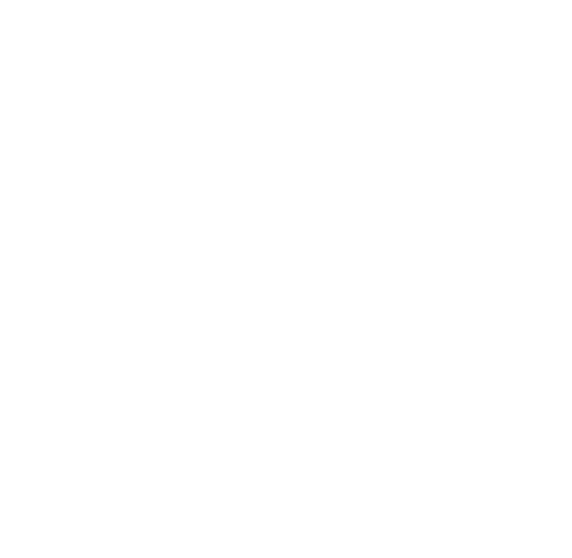

In [182]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dt_tuned.best_estimator_,
               feature_names = x.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

In [183]:
# plt.figsize(10, 8)
feat_importances = pd.Series(dt_tuned.best_estimator_.feature_importances_, index=x.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

AttributeError: ignored

# **Random Forest**

In [184]:
x = df.drop(columns=['sellingprice_std','sellingprice','year_std','make','body','transmission','transmission_label','condition_std','odometer_std','color','saledate','top_20_brand','pricesegmentation']) # menggunakan semua feature kecuali target
y = df['sellingprice']

KeyError: ignored

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42) #Splitting the data into Train and Test

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
eval_regression(rf, pred, X_train, y_train, X_test,y_test)

In [187]:
print("train Accuracy : ",rf.score(X_train,y_train))
print("test Accuracy : ",rf.score(X_test,y_test))

ValueError: ignored

In [188]:
show_feature_importance(rf)

AttributeError: ignored

In [189]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
hyperparameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Init
rf = RandomForestRegressor(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='r2')
rf_tuned.fit(X_train,y_train)
# Predict & Evaluation
pred = rf_tuned.predict(X_test)
eval_regression(rf_tuned, pred, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 328, in fit
    X, y, multi_output=True, accept_sparse="csc", dtype=DTYPE
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/pyt

ValueError: ignored

In [190]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
rf_tuned = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring= 'r2')

# Init
#rf = RandomForestRegressor(random_state=42)
#rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='r2')
#rf_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_regression(rf_tuned, pred, X_train, y_train, X_test, y_test)

NameError: ignored

In [191]:
print('Train score: ' + str(rf_tuned.score(X_train, y_train)))
print('Test score:' + str(rf_tuned.score(X_test, y_test)))

NotFittedError: ignored

In [192]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

AttributeError: ignored

# **XGBoost**

In [193]:
x = df.drop(columns=['sellingprice_std','sellingprice','year_std','make','body','transmission','transmission_label','condition_std','odometer_std','color','saledate','top_20_brand']) # menggunakan semua feature kecuali target
y = df['sellingprice']

KeyError: ignored

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42) #Splitting the data into Train and Test

In [195]:
from xgboost import XGBClassifier, XGBRegressor
xg = XGBRegressor(random_state=42)
xg.fit(X_train, y_train)
pred = xg.predict(X_test)
eval_regression(xg, pred, X_train, y_train, X_test, y_test)

ValueError: ignored

In [196]:
print("train Accuracy : ",xg.score(X_train,y_train))
print("test Accuracy : ",xg.score(X_test,y_test))

ValueError: ignored

In [197]:
show_feature_importance(xg)

XGBoostError: ignored

In [198]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth': [3,6,10],
                   'eta':[0.3,0.6,0.9,1,3,5]
                    }

# Init
xg = XGBRegressor(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters,n_iter=15, cv=5, random_state=42, scoring='r2')
xg_tuned.fit(X_train,y_train)
# Predict & Evaluation
pred = xg_tuned.predict(X_test)
eval_regression(xg_tuned, pred, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 360, in fit
    trainDmatrix = DMatrix(X, label=y, missing=self.missing, nthread=self.n_jobs)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 380, in __init__
    feature_types)
  File "/usr/local/lib/python3.7/dist-package

ValueError: ignored

In [199]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 3
Best eta: 0.3


In [200]:
show_feature_importance(xg_tuned.best_estimator_)

XGBoostError: ignored

In [201]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth': [10],
                   'eta':[0.9],
                   'min_child_weight' :[1, 10, 100],
                   'tree_method' : ['auto', 'exact', 'approx', 'hist']
                    }

# Init
xg = XGBRegressor(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, n_iter=15,cv=5, random_state=42, scoring='r2')
xg_tuned.fit(X_train,y_train)
# Predict & Evaluation
pred = xg_tuned.predict(X_test)
eval_regression(xg_tuned, pred, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=15. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 360, in fit


ValueError: ignored

In [202]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 10
Best eta: 0.9
Best min_child_weight: 1
Best tree_method: auto


In [203]:
print('Train score: ' + str(xg_tuned.score(X_train, y_train)))
print('Test score:' + str(xg_tuned.score(X_test, y_test)))

AttributeError: ignored

In [204]:
show_feature_importance(xg_tuned.best_estimator_)

XGBoostError: ignored

# **Conclusion**

In [205]:
regressors = [Ridge(alpha=300,solver='sag',fit_intercept=True),
              DecisionTreeRegressor(max_depth=42,min_samples_split=2,min_samples_leaf=50,max_features='auto'),
              RandomForestRegressor(n_estimators=200,max_features='sqrt',max_depth=None,min_samples_split=5,min_samples_leaf=1,bootstrap=True),
              XGBRegressor(max_depth=10,eta=0.9,min_child_weight=10,tree_method='approx'),
              ]

dfcheck = pd.DataFrame(columns = ['Method', 'MAE', 'RMSE', 'R2 Score'])

In [206]:
for regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    method = str(type(regressor)).split('.')[-1][:-2]
    
    # MAE score
    mae = mean_absolute_error(y_test, y_pred)
    
    #RMSE Score
    rmse_value = mean_squared_error(y_test, y_pred,squared=False)
    
    #R2 Score
    r2 = r2_score(y_test, y_pred)
    
    dfcheck = dfcheck.append({'Method': method, 
                    'MAE': mae, 
                    'RMSE': rmse_value,
                    'R2 Score': r2},
                     ignore_index=True)

ValueError: ignored

In [207]:
dfcheck

,Method,MAE,RMSE,R2 Score
